## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [20]:
pd.set_option('display.max_columns', 100)

## Exploratory data analysis

In [21]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
#observe the different feature type present in the data

df.shape

(284807, 31)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
## Handling missing values
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


In [26]:
classes = df['Class'].value_counts()
classes

,count
Class,
0,284315
1,492


Here we will observe the distribution of our classes

In [27]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


normal_share

np.float64(99.82725143693798)

In [28]:
fraud_share

np.float64(0.1727485630620034)

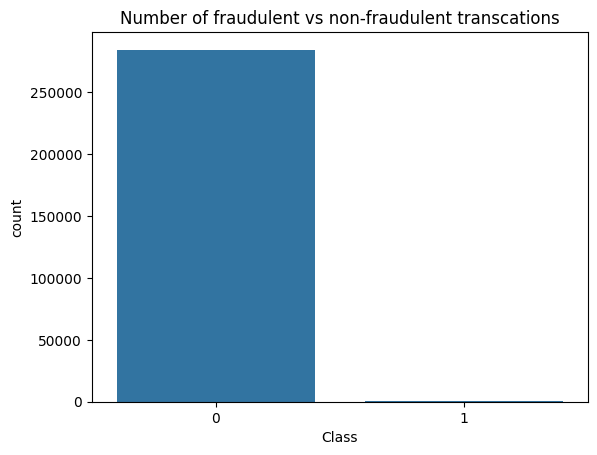

In [29]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()


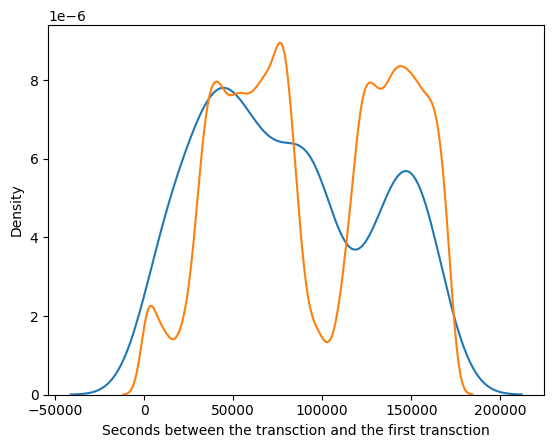

In [30]:
# Create a scatter plot to observe the distribution of classes with time
dt_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
dt_non_fraud = df[df['Class'] == 0]

ax = sns.distplot(dt_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(dt_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds between the transction and the first transction')
plt.show()

In [31]:
## No specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the `Time` column.

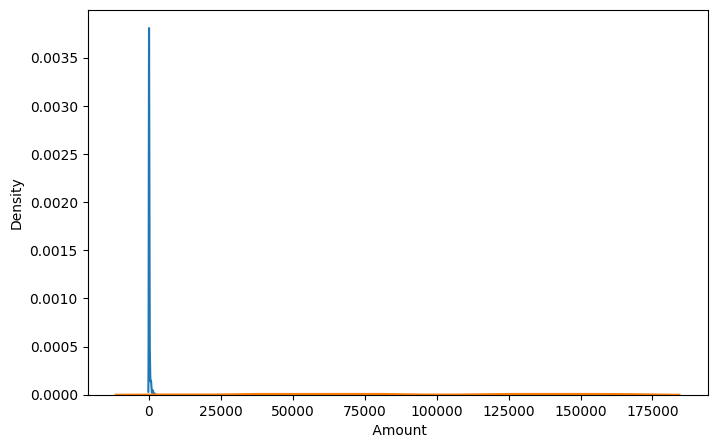

In [32]:
# Create a scatter plot to observe the distribution of classes with Amount
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(dt_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(dt_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel=' Amount')
plt.show()

In [33]:
##Fraudulent transactions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

In [34]:
# Drop unnecessary columns
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)


### Splitting the data into train & test data

In [35]:
#y= #class variable
y = df['Class']

In [36]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [38]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [39]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [40]:
# Instantiate the Scaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [41]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


### Plotting the distribution of a variable

In [42]:
# plot the histogram of a variable from the dataset to see the skewness

In [43]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

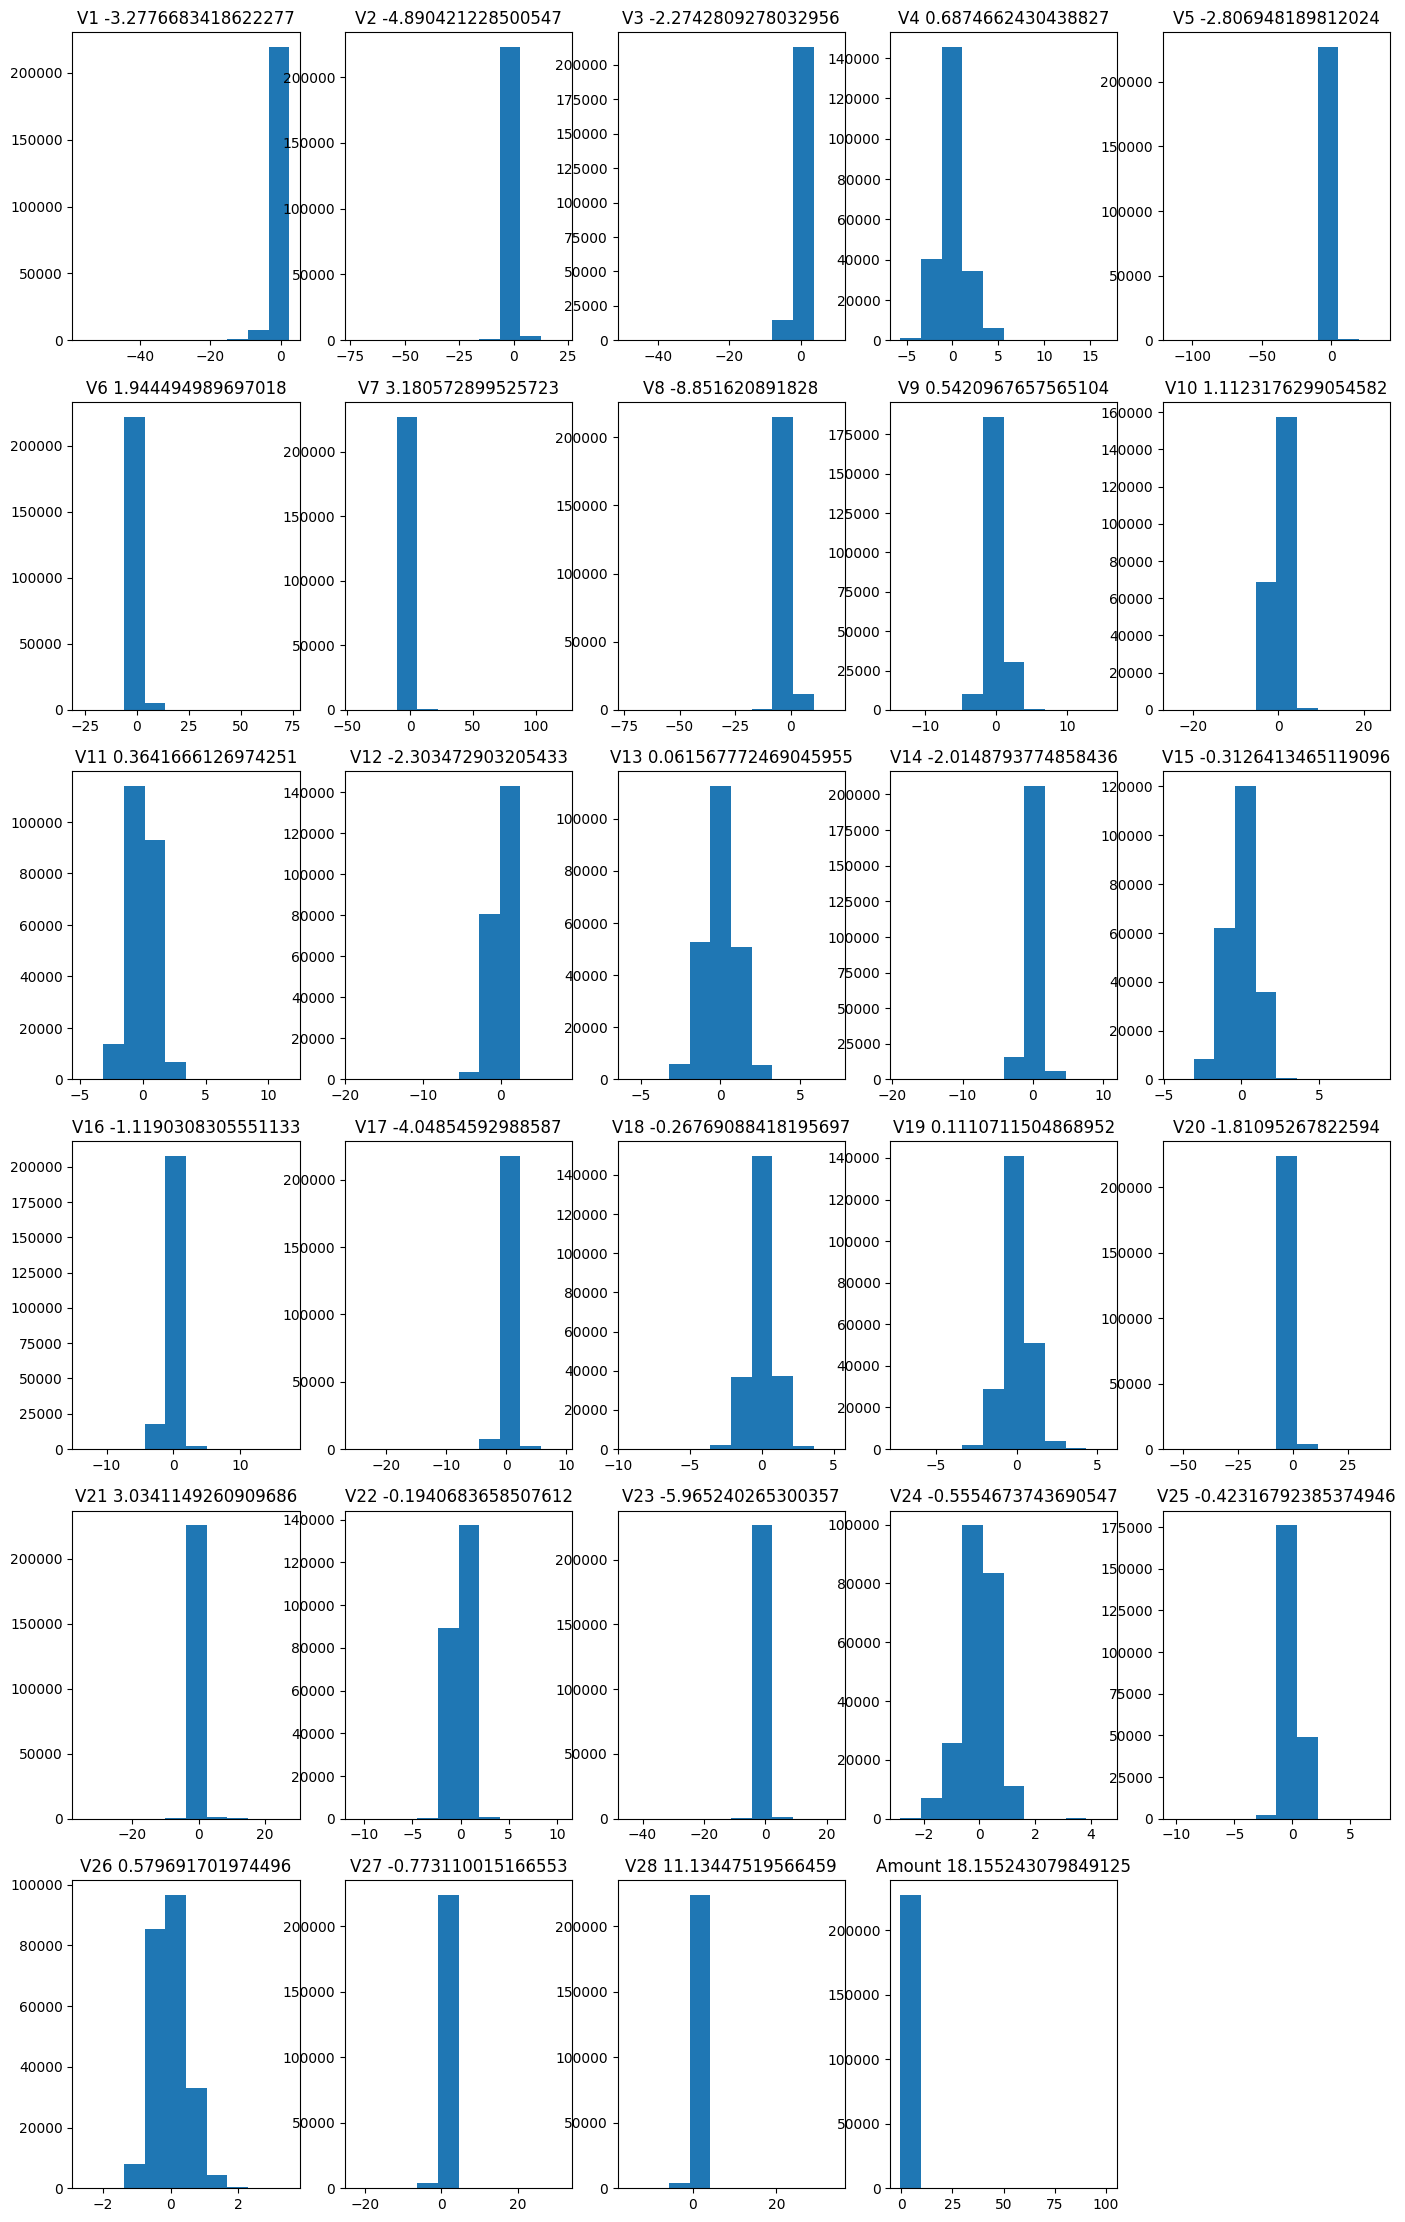

In [44]:
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    plt.hist(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

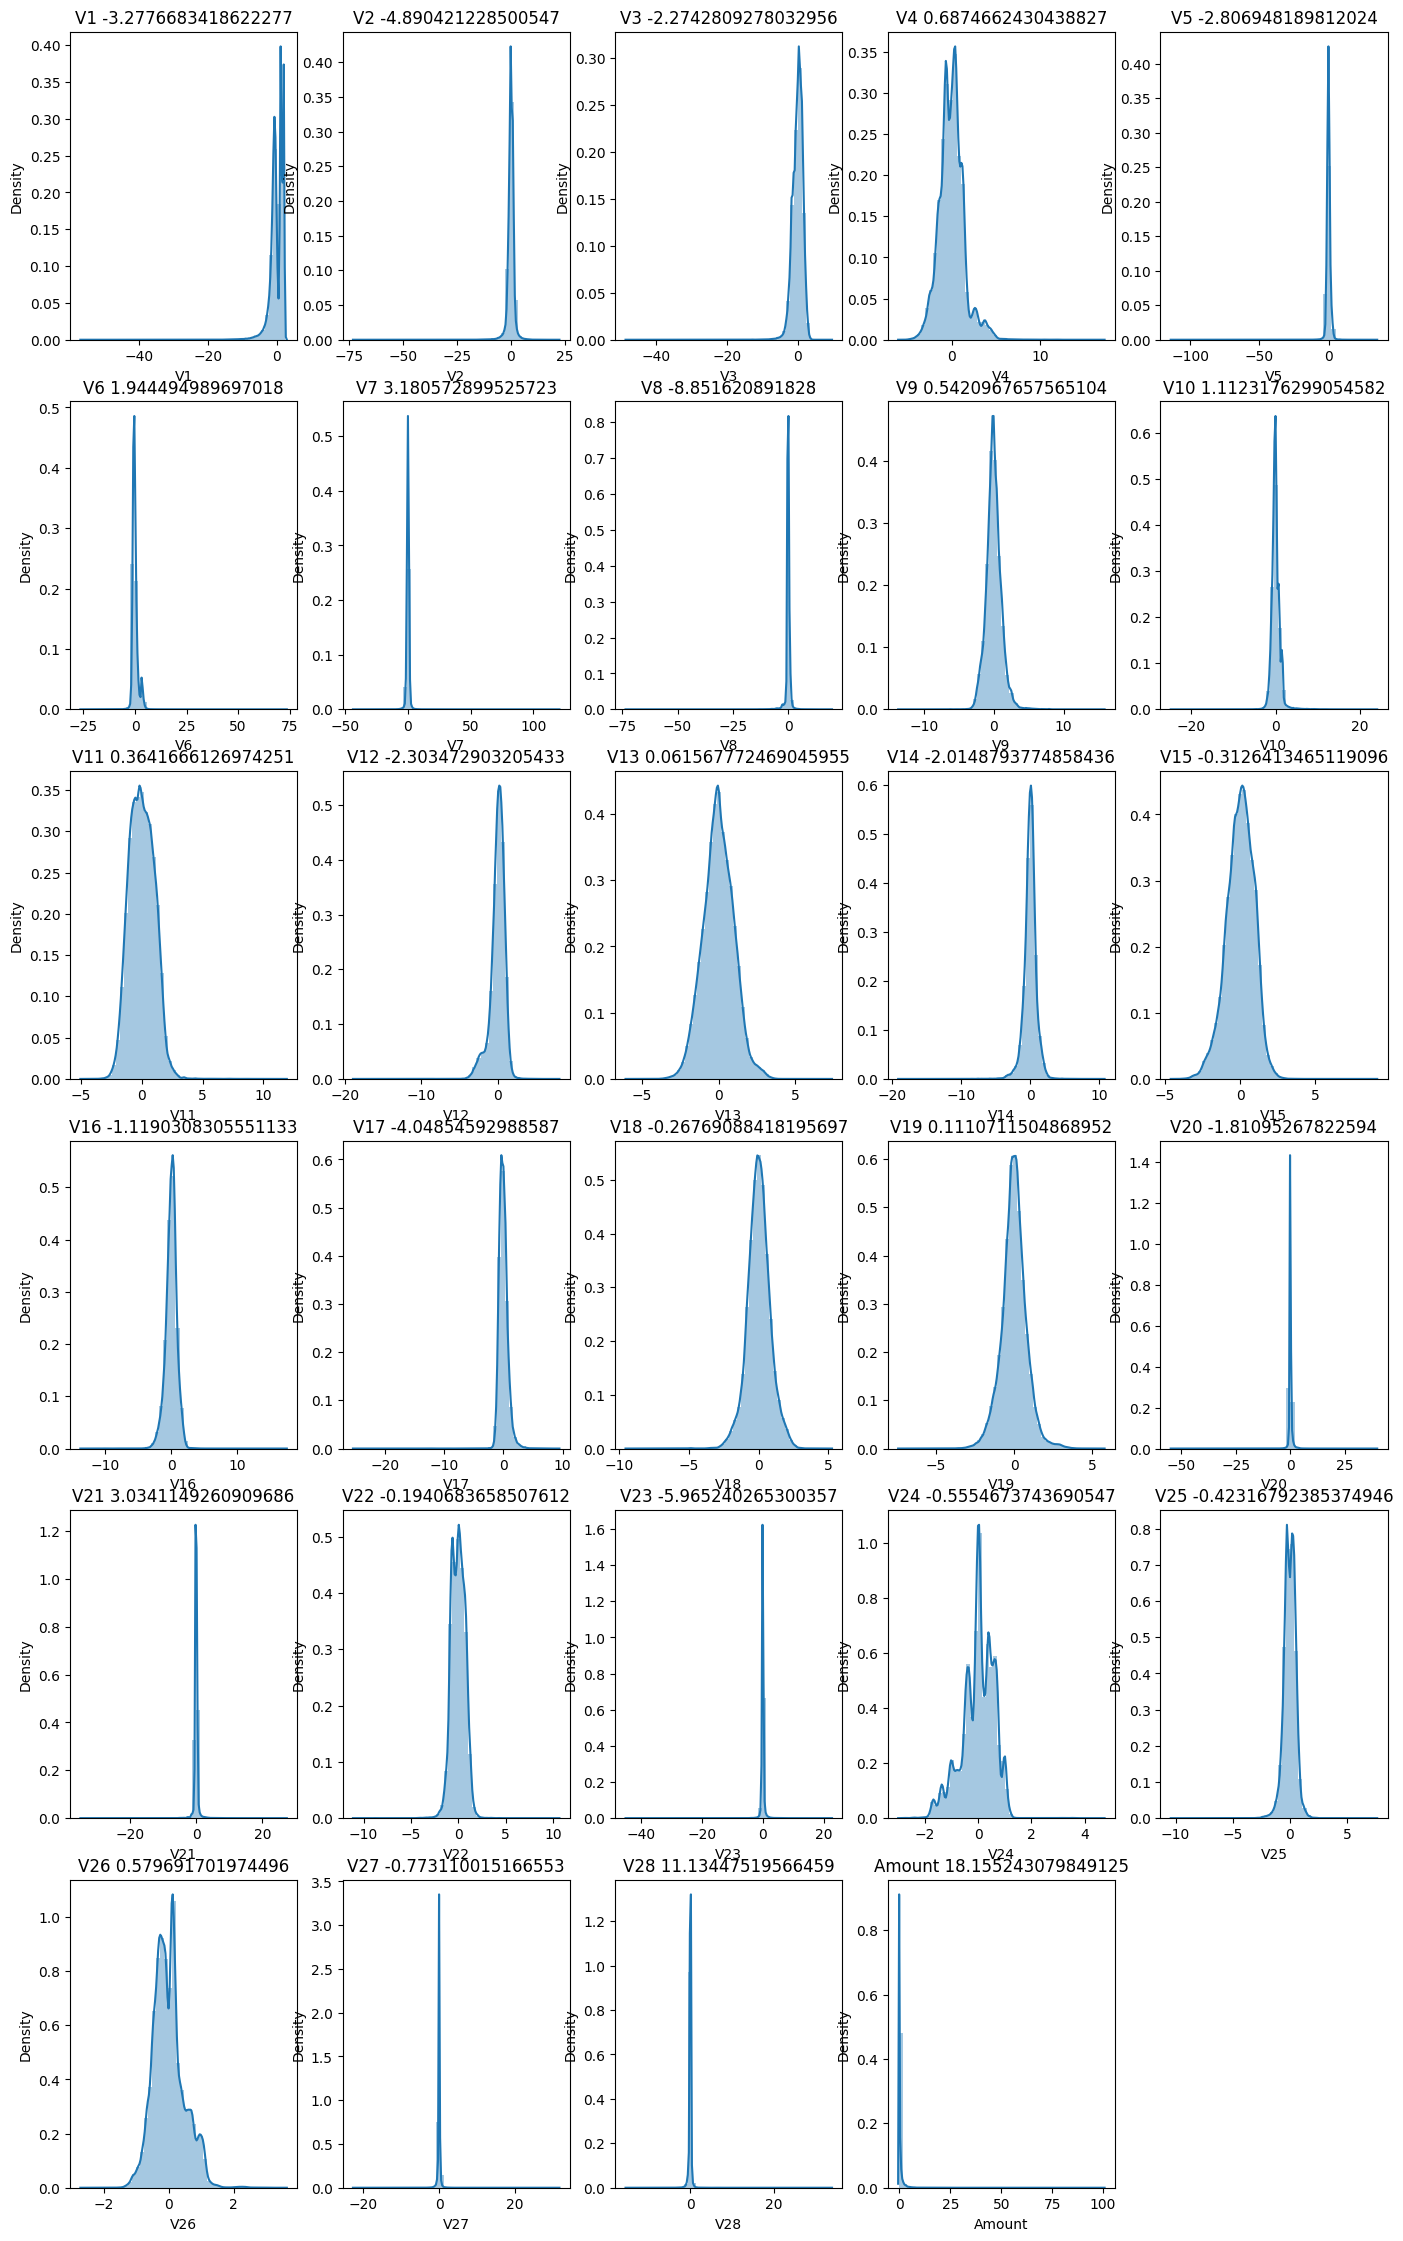

In [45]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [46]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)



In [47]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

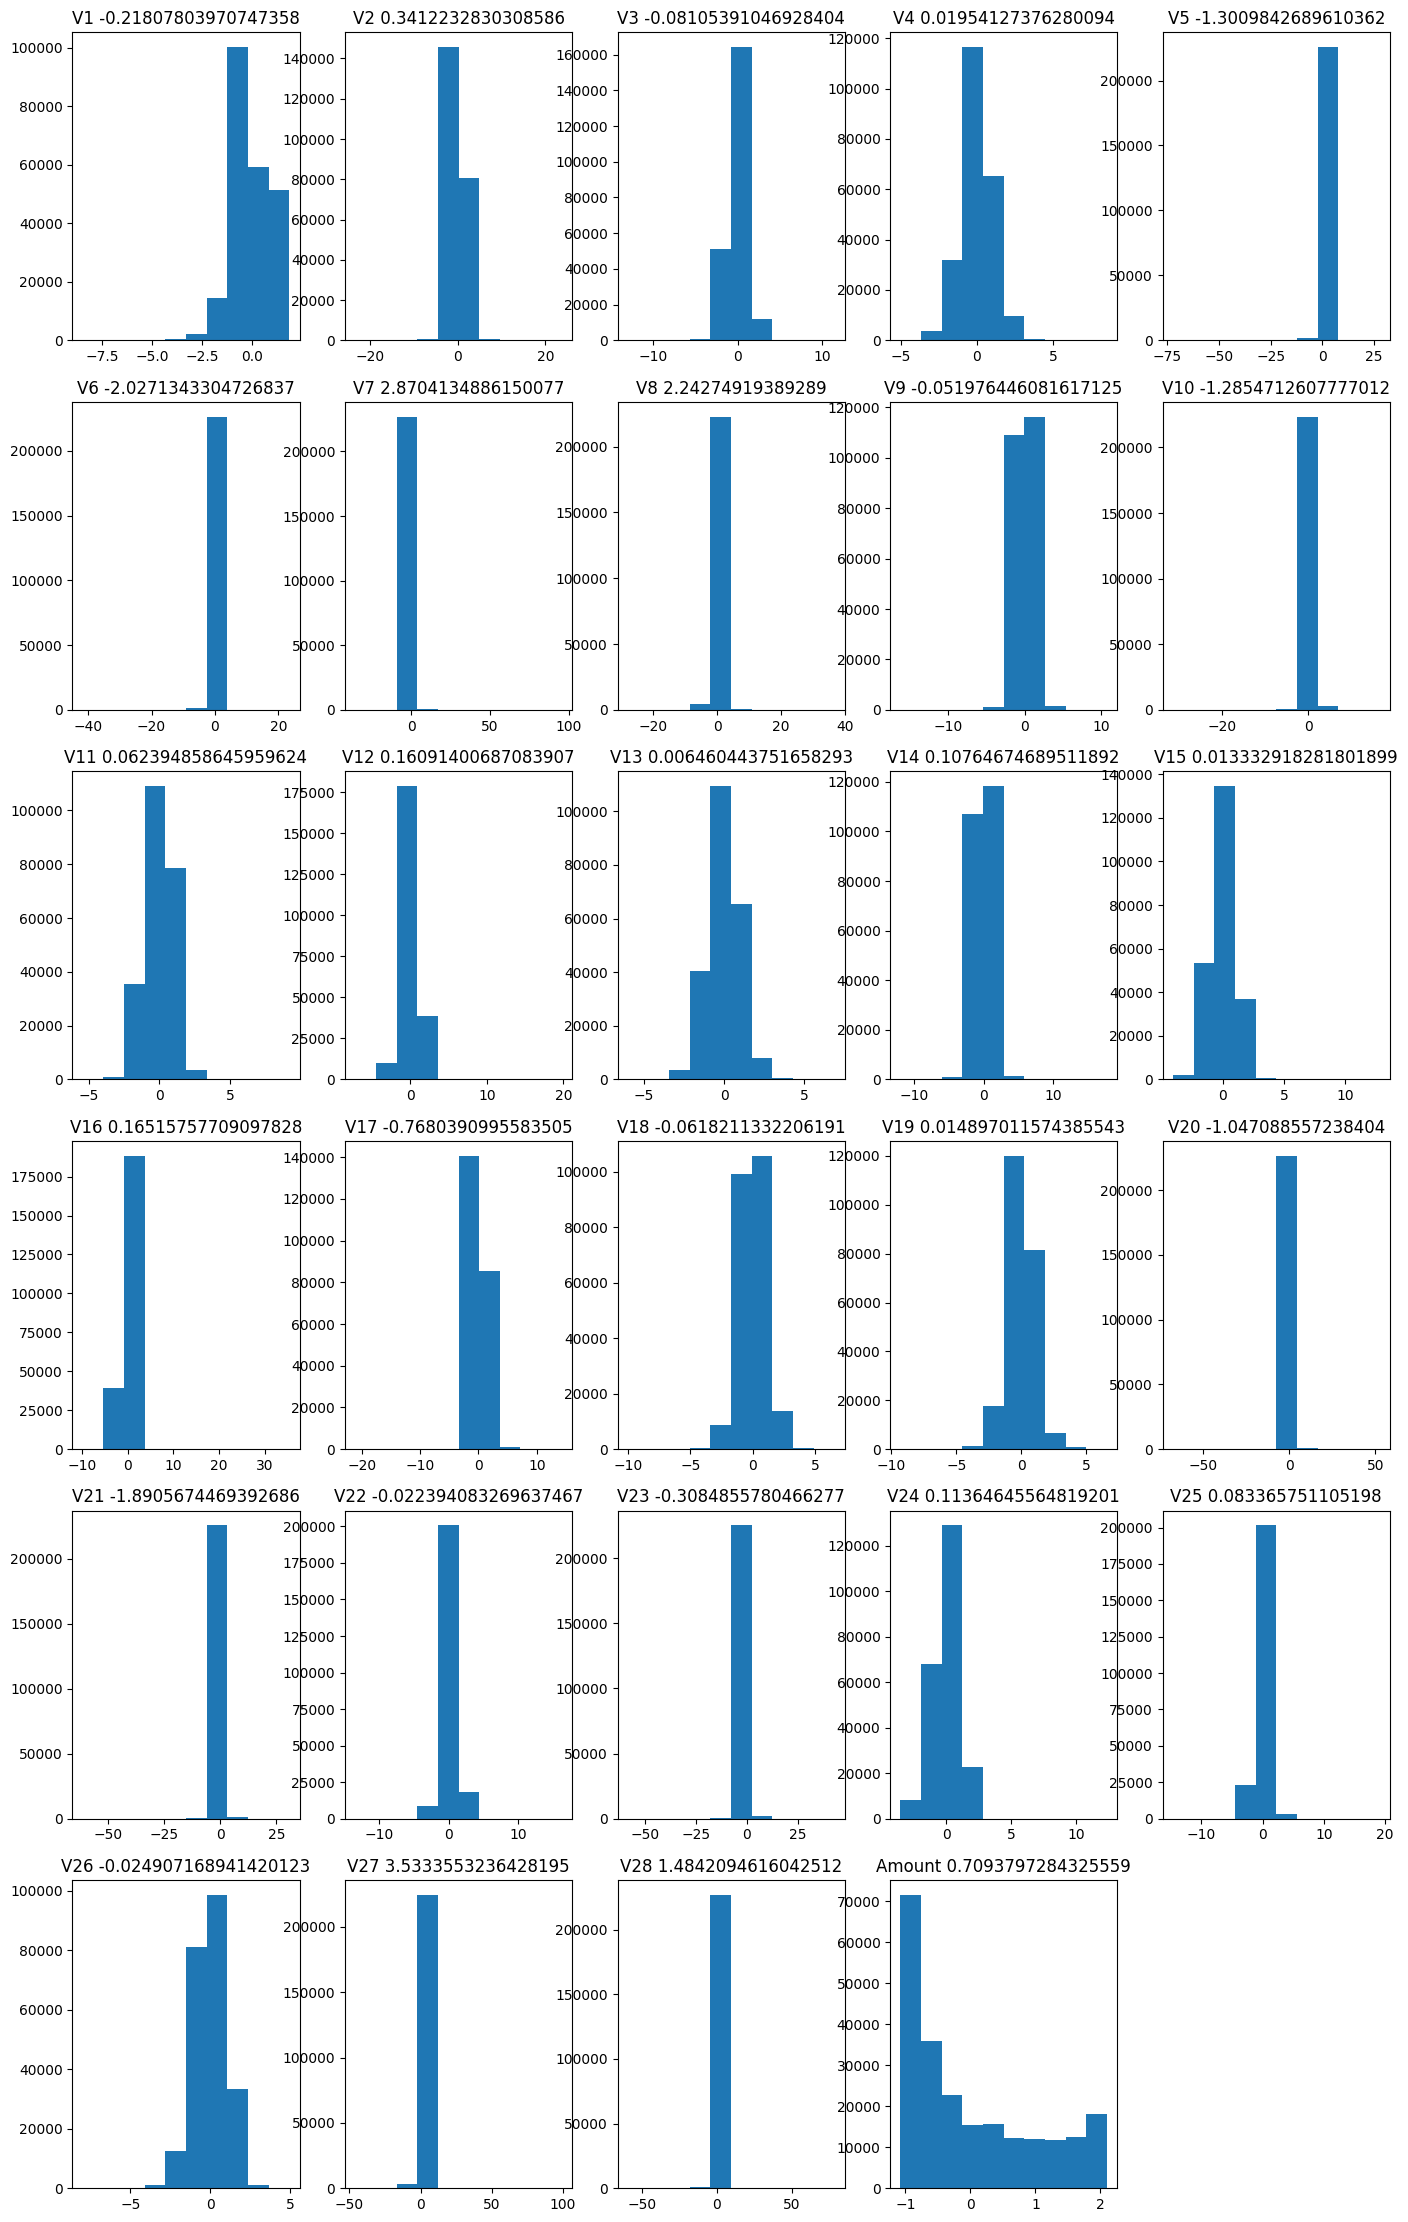

In [48]:
# plot the histogram of a variable from the dataset again to see the result
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    plt.hist(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

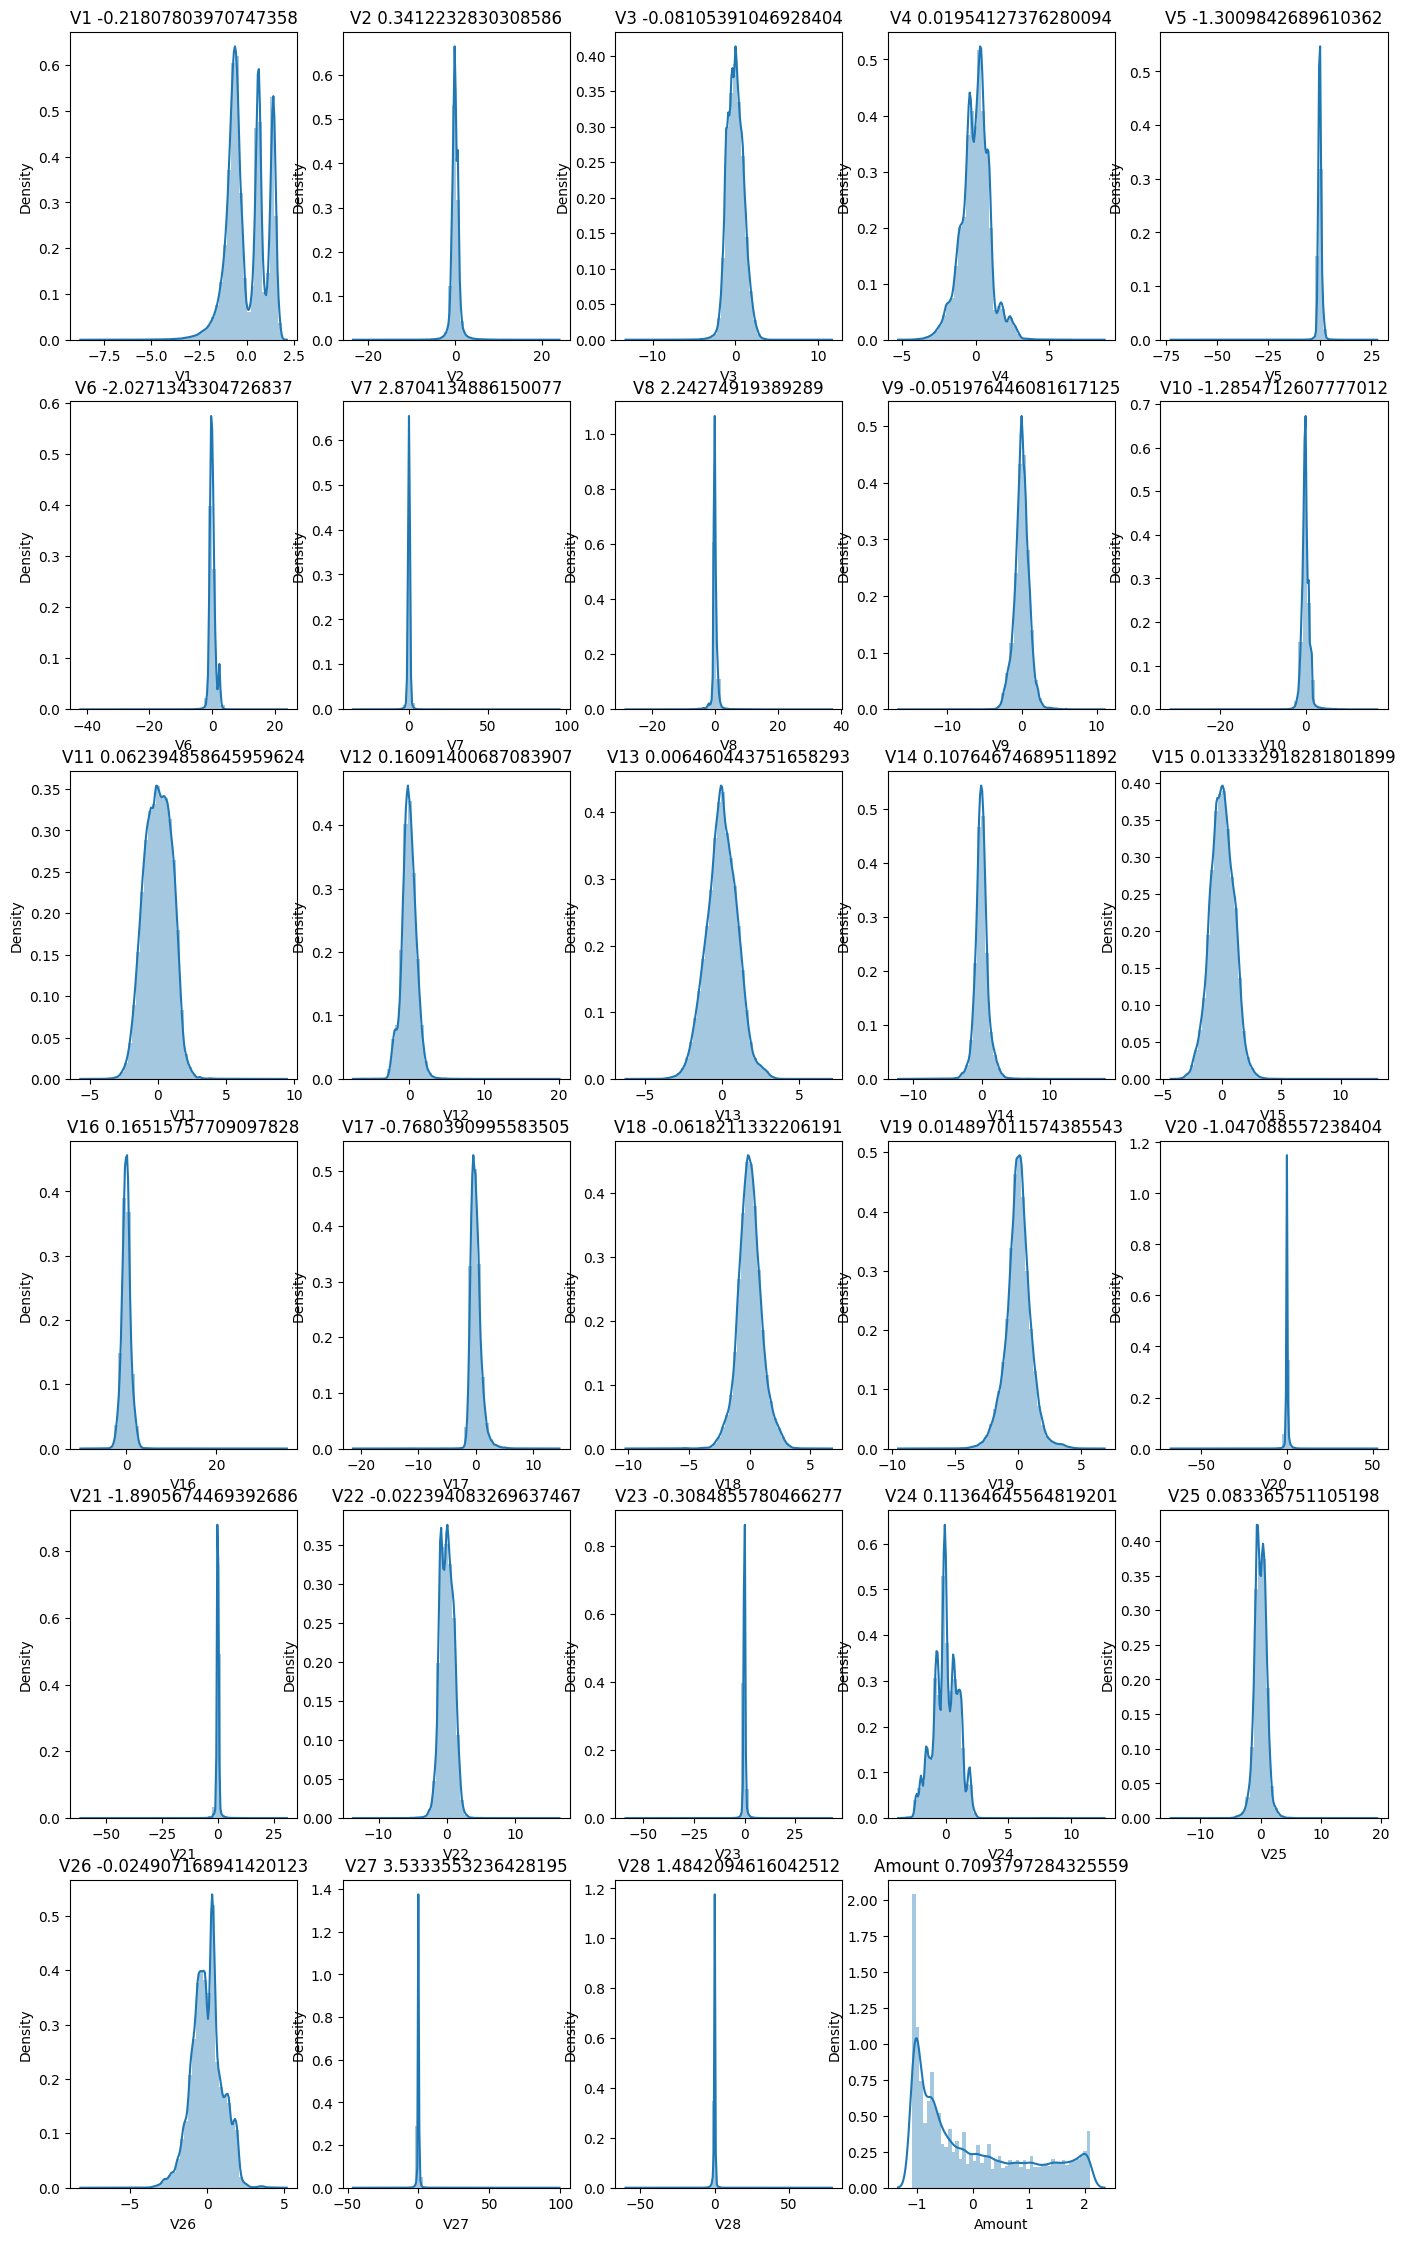

In [49]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

## Model Building
- Build different models on the imbalanced dataset and see the result

In [50]:
## Data is Balanced now

In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [52]:
#### perfom cross validation on the X_train & y_train to create:
#- X_train_cv
#- X_test_cv
#- y_train_cv
#- y_test_cv

In [53]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [54]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.759465,0.055051,0.040120,0.010964,0.01,{'C': 0.01},0.986595,0.987068,0.969244,0.981472,0.993990,0.983674,0.008241,1,0.983877,0.984106,0.988321,0.985739,0.982709,0.984950,0.001943
1,0.757047,0.020061,0.045046,0.010457,0.10,{'C': 0.1},0.985593,0.987368,0.966190,0.980005,0.994159,0.982663,0.009395,2,0.982962,0.983607,0.988169,0.984679,0.981988,0.984281,0.002132
2,0.997733,0.250773,0.049799,0.010545,1.00,{'C': 1},0.985601,0.987346,0.960695,0.979551,0.994229,0.981484,0.011399,3,0.982770,0.983390,0.987509,0.984222,0.981921,0.983962,0.001927
3,0.798052,0.079631,0.038167,0.009468,10.00,{'C': 10},0.985580,0.987338,0.961110,0.979525,0.991787,0.981068,0.010726,4,0.982758,0.983365,0.987466,0.984354,0.980767,0.983742,0.002200
4,0.944469,0.276092,0.047853,0.019869,100.00,{'C': 100},0.985578,0.987338,0.959647,0.979517,0.991783,0.980772,0.011272,5,0.982757,0.983362,0.987354,0.984366,0.980764,0.983721,0.002164
5,0.909879,0.142484,0.045357,0.013779,1000.00,{'C': 1000},0.985578,0.987338,0.959637,0.979519,0.991782,0.980771,0.011275,6,0.982757,0.983362,0.987352,0.984367,0.980764,0.983721,0.002164


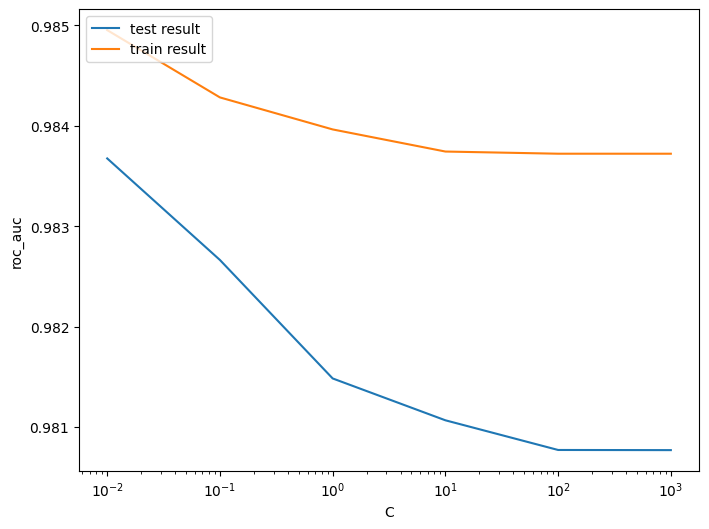

In [55]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [56]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9836736960858568 at C = 0.01


In [57]:
logistic_bestc = LogisticRegression(C=0.01)

In [58]:
# Fit the model on the train set
logistic_bestc_model = logistic_bestc.fit(X_train, y_train)

In [59]:
# Predictions on the train set
y_train_pred = logistic_bestc_model.predict(X_train)

In [60]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   138    258]]


In [61]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999297768219623
Sensitivity:- 0.6515151515151515
Specificity:- 0.9999032750198946
F1-Score:- 0.7633136094674556


In [63]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.65      0.76       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [64]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [65]:
# Predicted probability
y_train_pred_proba = logistic_bestc_model.predict_proba(X_train)[:,1]

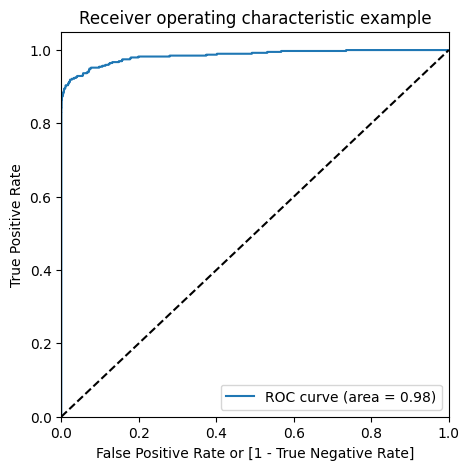

In [66]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [67]:
#ROC Curve : 0.98

In [68]:
# Prediction on the test set
y_test_pred = logistic_bestc_model.predict(X_test)

In [69]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [70]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385542


In [72]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [73]:
# Predicted probability
y_test_pred_prob= logistic_bestc_model.predict_proba(X_test)[:,1]

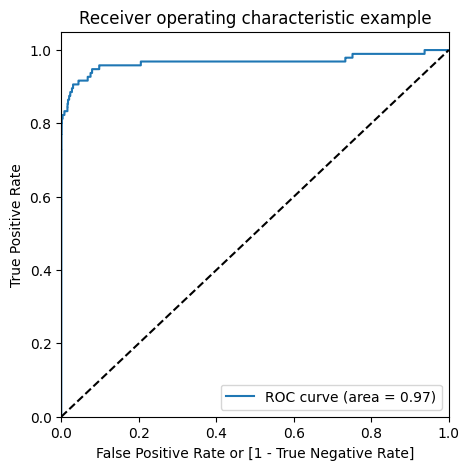

In [74]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

In [75]:
# *** LOGISTIC REGRESION IMBALANCED DATA Model summary***

#- Train set
#Accuracy:- 0.999297768219623
#Sensitivity:- 0.6515151515151515
#Specificity:- 0.9999032750198946
#F1-Score:- 0.7633136094674556
# ROC = 0.99
#- Test set
#Accuracy:- 0.9989817773252344
#Sensitivity:- 0.5625
#Specificity:- 0.9997186367952731
#F1-Score:- 0.6506024096385542
#ROC = 0.97

#Overall, the model is performing well in the test set, what it had learnt from the train set.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [76]:
#K-Nearest Neighbors (KNN) was not used for model building due to its lack of memory efficiency and scalability. As the number of data points increases, KNN becomes significantly slower, since it needs to store the entire dataset in memory.

#Additionally, KNN is computationally expensive during prediction. For each new data point, the algorithm must compute the distance to every point in the training set in order to identify the nearest neighbors. This results in high computation time, especially with large datasets like ours. Due to these limitations, KNN was not considered a practical choice for this project.



In [77]:
#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
#The dataset contains 284,807 data points, and this number increases significantly after applying oversampling techniques. Support Vector Machines (SVMs) are generally not well-suited for large datasets, as they require substantial computational resources and time, especially during the transformation process and training phase.
##When combined with K-Fold cross-validation for hyperparameter tuning, the computational cost of using SVMs becomes even more prohibitive. Due to these constraints—specifically the lack of sufficient computational resources and time—SVM was not used for model building.
#For similar reasons, Random Forest was also not applied in certain hyperparameter tuning scenarios, particularly when using oversampled data. The increased data size and complexity would have significantly extended the training time and resource usage, making it impractical under the available conditions.



In [78]:
#As observed, the dataset is highly imbalanced, with only 0.17% of transactions being fraudulent. In such cases, accuracy is not a reliable evaluation metric. This is because a model that predicts all transactions as non-fraudulent (class 0), regardless of the input, would still achieve over 99% accuracy — while completely failing to detect fraud.

#To fairly evaluate the model's performance, we should focus on the ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score. The ROC curve assesses the model’s performance across all classification thresholds, rather than relying solely on the default threshold of 0.5 — which may not be optimal for imbalanced datasets.

#By analyzing the ROC curve, we can identify a threshold where the True Positive Rate (TPR) is high and the False Positive Rate (FPR) is low, thereby minimizing misclassifications. Once the optimal threshold is selected, we can then calculate the F1 score, which balances precision and recall, to further evaluate the model's effectiveness at that specific threshold.



In [79]:
### XGBoost
from xgboost import XGBClassifier

In [80]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [81]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.085615,0.996667,0.142441,0.007781,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975585,0.974595,0.980946,0.977042,0.002790,1,0.999865,0.999600,0.999272,0.999579,0.000243
1,4.074607,0.921002,0.130365,0.001406,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972484,0.976596,0.978129,0.975736,0.002383,2,0.999963,0.999952,0.999955,0.999957,0.000005
2,3.870911,0.988382,0.139846,0.009215,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.974963,0.972600,0.979148,0.975570,0.002707,3,0.999963,0.999971,0.999945,0.999960,0.000011
3,4.123032,0.915137,0.141505,0.009668,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.955029,0.953863,0.971355,0.960083,0.007985,6,0.999998,0.999997,0.999995,0.999997,0.000001
4,4.201059,0.948217,0.133356,0.003274,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.974179,0.970199,0.974645,0.973008,0.001995,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,4.003665,0.912422,0.132114,0.001421,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968630,0.972430,0.975082,0.972047,0.002648,5,1.000000,1.000000,1.000000,1.000000,0.000000


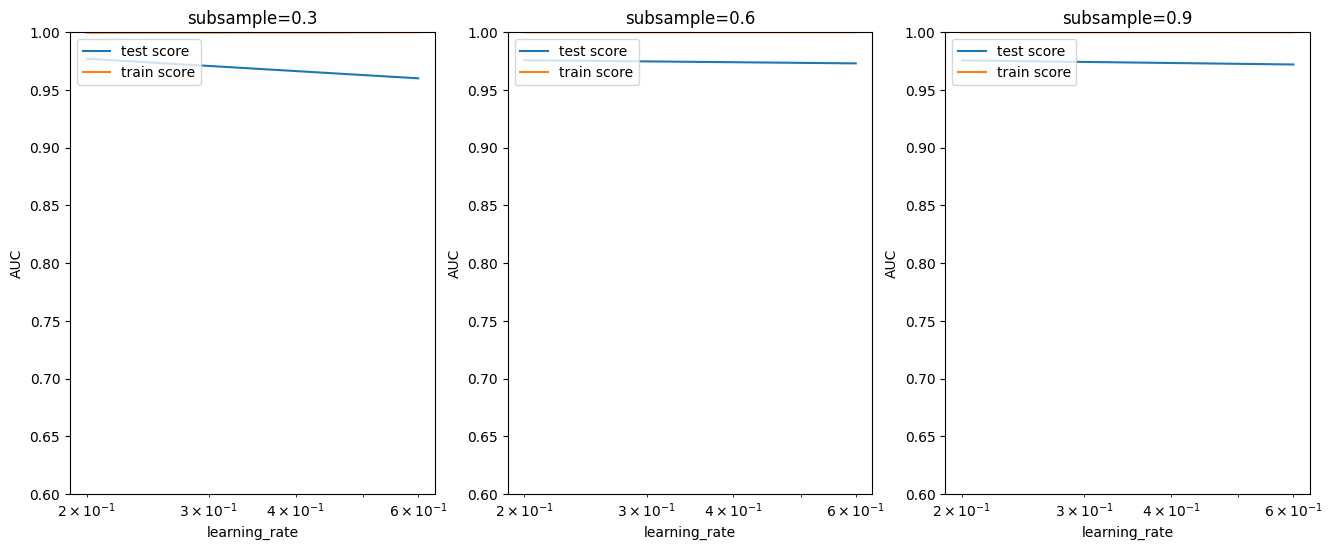

In [82]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [83]:
model_cv.best_params_


{'learning_rate': 0.2, 'subsample': 0.3}

In [84]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

In [85]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [86]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [87]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [89]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [90]:
# Predicted probability
y_train_pred_prob_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [91]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_prob_imb_xgb)
auc

np.float64(1.0)

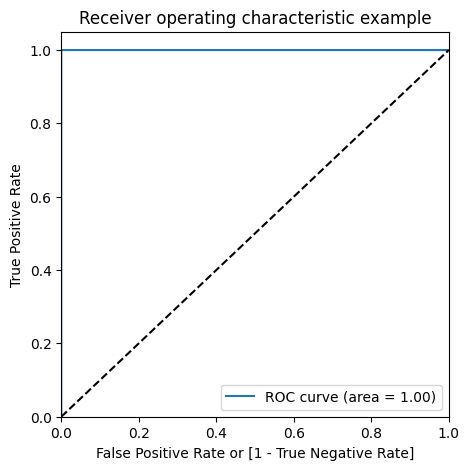

In [92]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_prob_imb_xgb)


In [93]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [94]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56858     8]
 [   25    71]]


In [95]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1-Score:- 0.8114285714285714


In [97]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [98]:
# Predicted probability
y_test_pred_prob = xgb_imb_model.predict_proba(X_test)[:,1]

In [99]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

np.float64(0.9723599118981465)

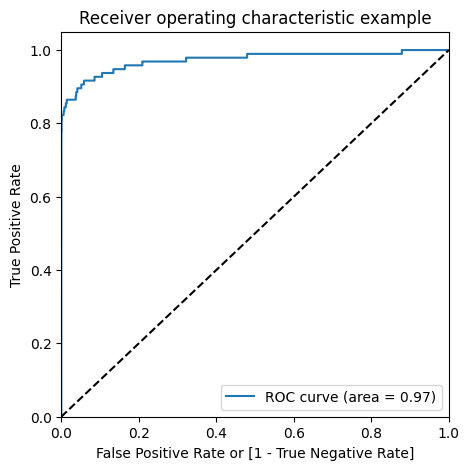

In [100]:
draw_roc(y_test, y_test_pred_prob)


In [101]:
# *** XGBOOST IMBALANCED DATA Model summary***

#Train Data
#Accuracy:- 1.0
#Sensitivity:- 1.0
#Specificity:- 1.0
#F1-Score:- 1.0
#AUC : 1.0

#Test Data
#Accuracy:- 0.999420666409185
#Sensitivity:- 0.7395833333333334
#Specificity:- 0.9998593183976365
#F1-Score:- 0.8114285714285714

#AUC :0.97

In [102]:
##Decision Tree
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
decisiontree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = decisiontree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [104]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [105]:
# Model with optimal hyperparameters
decisiontree_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

decisiontree_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [106]:
# Predictions on the train set
y_train_pred = decisiontree_imb_model.predict(X_train)

[[227449      0]
 [     0    396]]
Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.749003984063745
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845

auc 0.9534547393930157


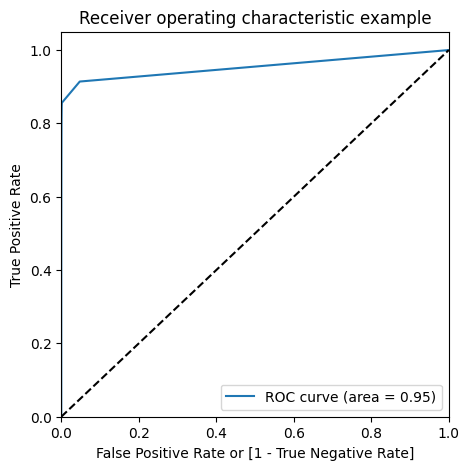

In [107]:
## Train Data Metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))
# classification_report
print(classification_report(y_train, y_train_pred))

# Predicted probability
y_train_pred_proba = decisiontree_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print ("auc" ,auc)

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [108]:
# Predictions on the test set
y_test_pred = decisiontree_imb_model.predict(X_test)

[[56836    30]
 [   40    56]]
Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.749003984063745
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



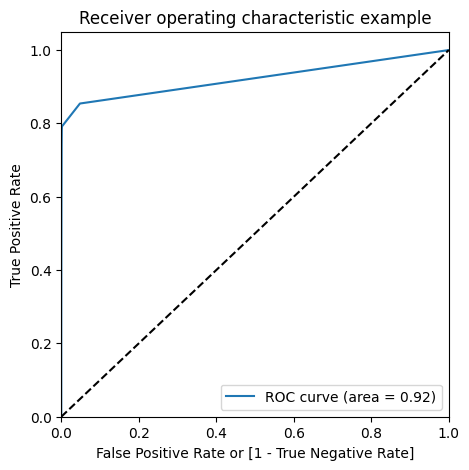

In [109]:
#Test data Metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_prob = decisiontree_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

In [110]:
# *** DECISION TREE IMBALANCED DATA Model summary***
#Train Data
#Accuracy:- 0.9991704887094297
#Sensitivity:- 1.0
#Specificity:- 1.0
#F1-Score:- 0.749003984063745
#ROC =.95
# Test Data
#Accuracy:- 0.9987711105649381
#Sensitivity:- 0.5833333333333334
#Specificity:- 0.9994724439911371
#F1-Score:- 0.749003984063745
#ROC = .92

In [111]:
# #Random forest , COMMENETED RANDOM FORST AS IT IS TAKING MORE THAN 2 HOURS AND NO OUTPUT
# Importing random forest classifier
#from sklearn.ensemble import RandomForestClassifier
#param_grid = {
#    'max_depth': range(5,10,5),
##    'min_samples_leaf': range(50, 150, 50),
#    'min_samples_split': range(50, 150, 50),
#    'n_estimators': [100,200,300],
#    'max_features': [10, 20]
#}
# Create a based model
#rf = RandomForestClassifier()
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf,
#                           param_grid = param_grid,
#                           cv = 2,
#                           n_jobs = -1,
#                           verbose = 1,
#                           return_train_score=True)

# Fit the model
#grid_search.fit(X_train, y_train)

In [112]:
# printing the optimal accuracy score and hyperparameters
#print('BeSt score',grid_search.best_score_,'BeSt Param',grid_search.best_params_)

In [113]:
# model with the best hyperparameters

#rf_imb_model = RandomForestClassifier(bootstrap=True,
#                             max_depth=5,
#                             min_samples_leaf=50,
#                             min_samples_split=50,
#                             max_features=10,
#                             n_estimators=100)

In [114]:
# Fit the model
#rf_imb_model.fit(X_train, y_train)

In [115]:
# Predictions on the train set
#y_train_pred = rf_imb_model.predict(X_train)

In [116]:
## Train Data Metrics

# Confusion matrix
#confusion = metrics.confusion_matrix(y_train, y_train)
#print(confusion)
#TP = confusion[1,1] # true positive
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives
# Accuracy
#print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
#print("Sensitivity:-",TP / float(TP+FN))

# Specificity
#print("Specificity:-", TN / float(TN+FP))

# F1 score
#print("F1-Score:-", f1_score(y_train, y_train_pred))
# classification_report
#print(classification_report(y_train, y_train_pred))

# Predicted probability
#y_train_pred_proba = rf_imb_model.predict_proba(X_train)[:,1]

# roc_auc
#auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
#print ("auc" ,auc)

# Plot the ROC curve
#draw_roc(y_train, y_train_pred_proba)

In [117]:
#Prediction on the test set
#y_test_pred = rf_imb_model.predict(X_test)

In [118]:
#Test data Metrics
# Confusion matrix
#confusion = metrics.confusion_matrix(y_test, y_test_pred)
#print(confusion)
#TP = confusion[1,1] # true positive
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives
# Accuracy
#print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
#print("Sensitivity:-",TP / float(TP+FN))

# Specificity
#print("Specificity:-", TN / float(TN+FP))

# F1 score
#print("F1-Score:-", f1_score(y_train, y_train_pred))

# classification_report
#print(classification_report(y_test, y_test_pred))

# Predicted probability
#y_test_pred_prob = rf_imb_model.predict_proba(X_test)[:,1]

# roc_auc
#auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
#auc

# Plot the ROC curve
#draw_roc(y_test, y_test_pred_prob)

In [119]:
# *** RANDOM FOREST IMBALANCED DATA Model summary***


In [120]:
#Choosing the Best Model for Imbalanced Data
#Among the models evaluated—Logistic Regression, XGBoost, Decision Tree, and Random Forest—most delivered strong performance. However, Logistic Regression and XGBoost stood out with the highest ROC-AUC scores. XGBoost achieved a perfect ROC-AUC score of 1.0 on the training set and 0.98 on the test set, slightly outperforming Logistic Regression.

#While Logistic Regression is more resource-efficient and cost-effective, XGBoost’s superior performance could translate into significant long-term savings for the bank. Even a 0.01 improvement in ROC-AUC may lead to more accurate predictions and better risk management, which in turn could have substantial financial impact.

In [121]:
#### Proceed with the model which shows the best result
#- Apply the best hyperparameter on the model
#- Predict on the test dataset

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


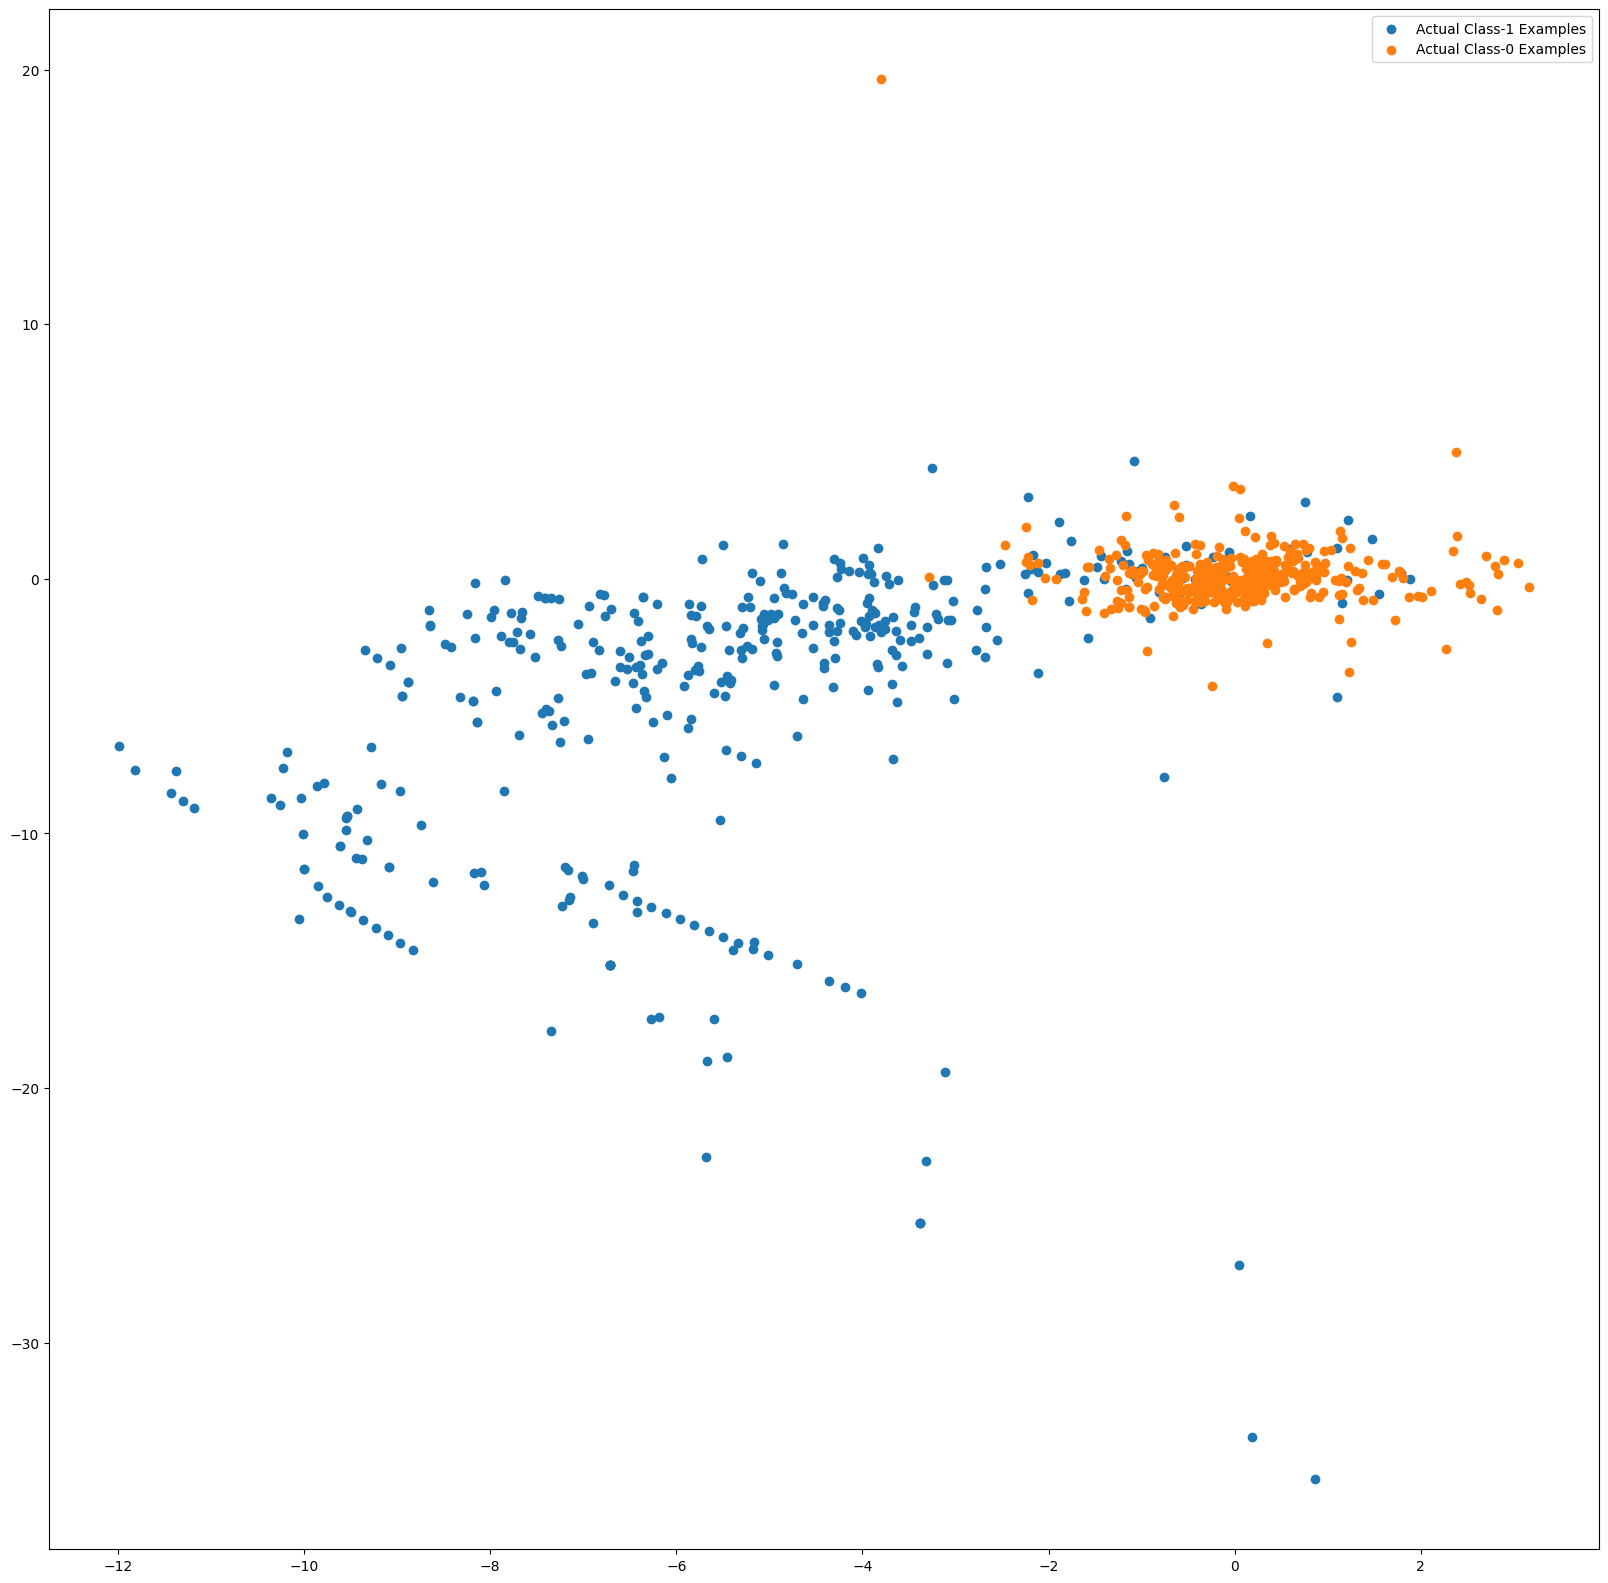

In [122]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [123]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_prob_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_prob_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.82052475


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

**Perform class balancing with : Random Oversampling**

In [124]:

# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler


In [125]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [126]:
from collections import Counter


In [127]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


**Logistic Regression with Random Oversampling**




In [128]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


 The highest roc_auc is 0.9885315084067005 at C = 0.1


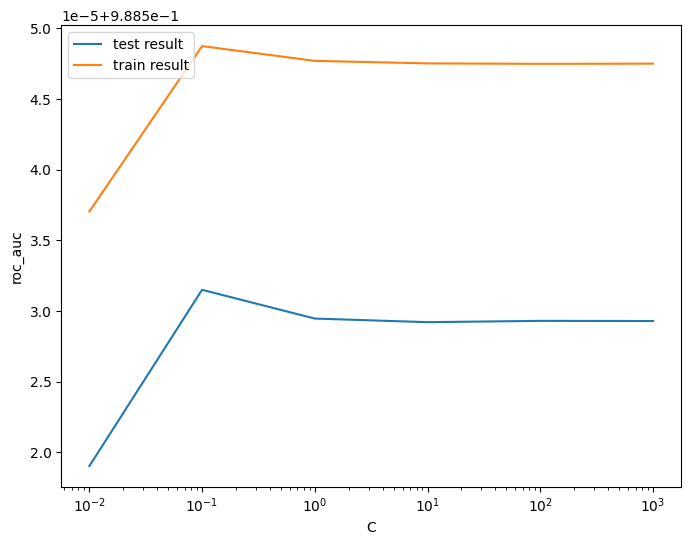

In [129]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest roc_auc is {0} at C = {1}".format(best_score, best_C))

**Logistic regression with RANDOM OVERSAMPLING  OPTIMAL C**

In [130]:
# Instantiate the model with best C
logistic_bal_ros_oc = LogisticRegression(C=0.1)
# Fit the model on the train set
logistic_bal_ros_oc_model = logistic_bal_ros_oc.fit(X_train_ros, y_train_ros)
# Predictions on the train set
y_train_pred = logistic_bal_ros_oc_model.predict(X_train_ros)


[[222240   5209]
 [ 17824 209625]]
Accuracy:- 0.9493666712098097
Sensitivity:- 0.9216351797545823
Specificity:- 0.977098162665037
F1-Score:- 0.9479224840204122
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



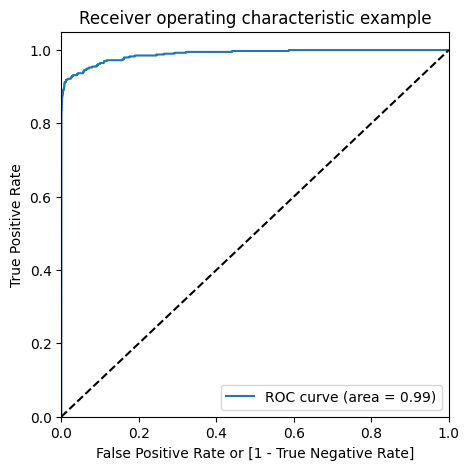

In [131]:
##Metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

# classification_report
print(classification_report(y_train_ros, y_train_pred))
# Predicted probability
y_train_pred_prob = logistic_bal_ros_oc_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_prob)
auc
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_prob)

In [132]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_oc_model.predict(X_test)

[[55529  1337]
 [   11    85]]
Accuracy:- 0.976335100593378
Sensitivity:- 0.8854166666666666
Specificity:- 0.9764885872050083
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



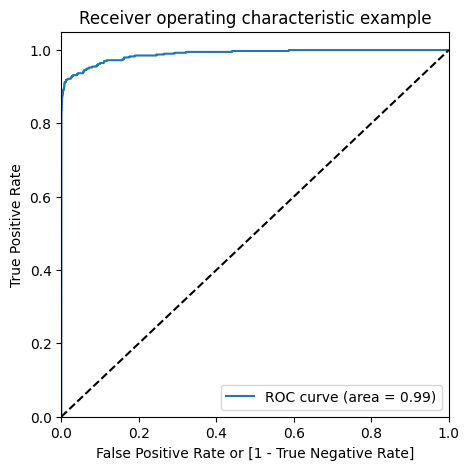

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))




# classification_report
print(classification_report(y_train_ros, y_train_pred))

# Predicted probability
y_train_pred_proba = logistic_bal_ros_oc_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [134]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_oc_model.predict(X_test)

[[55529  1337]
 [   11    85]]
Accuracy:- 0.976335100593378
Sensitivity:- 0.8854166666666666
Specificity:- 0.9764885872050083
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



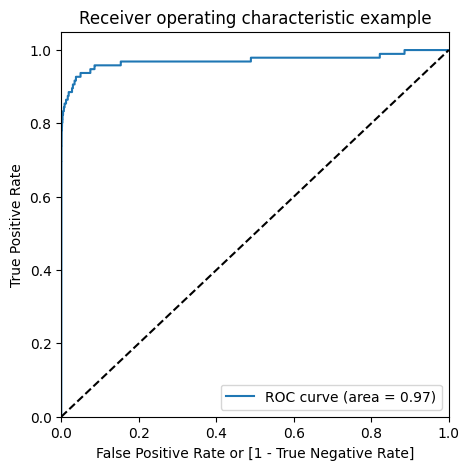

In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = logistic_bal_ros_oc_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)



# ***LOGISTIC REGRESSION RANDOM SAMPLING OPTILMAL C Model summary***
#Test Data
#Accuracy:- 0.9765808784803904
#Sensitivity:- 0.8854166666666666
#Specificity:- 0.9767347800091443
#ROC AOU : 99
#Train Data
#Accuracy:- 0.9765808784803904
#Sensitivity:- 0.8854166666666666
#Specificity:- 0.9767347800091443
#ROC AOU : 97






**XGBoost RANDOM SAMPLING**

In [136]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

cv_results = pd.DataFrame(model_cv.cv_results_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


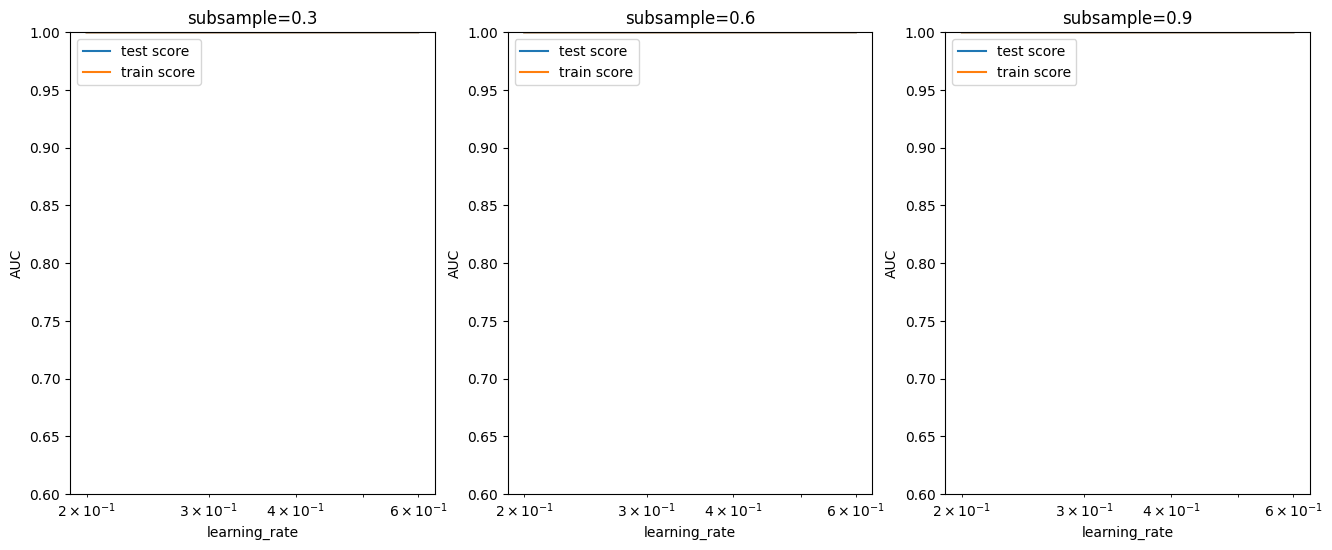

In [137]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [138]:
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.9}

In [139]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [140]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)


[[227449      0]
 [     0 227449]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



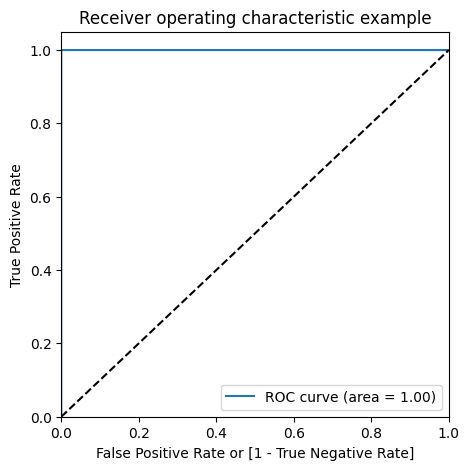

In [141]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_ros, y_train_pred))

# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [142]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

[[56857     9]
 [   22    74]]
Accuracy:- 0.9994557775359011
Sensitivity:- 0.7708333333333334
Specificity:- 0.9998417331973412
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.77      0.83        96

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



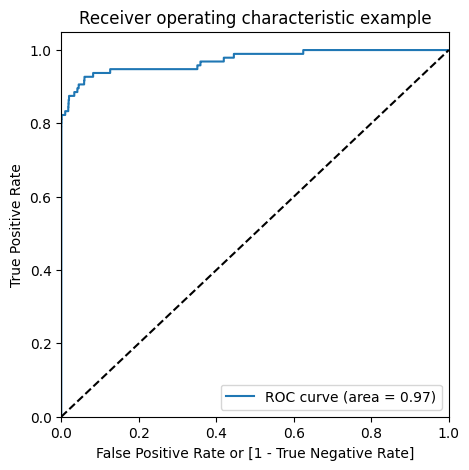

In [143]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## ***XGBOOST RANDOM SAMPLING Model summary***
#TRAIN DATA
#Accuracy:- 1.0
#Sensitivity:- 1.0
#Specificity:- 1.0
#ROC AOU:1.0
#TEST DATA
#Accuracy:- 0.9993504441557529
#Sensitivity:- 0.7604166666666666
#Specificity:- 0.9997538071958639
#ROC AUC - 0.98


**Decision Tree RANDOM SAMPLING**


In [144]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

cv_results = pd.DataFrame(grid_search.cv_results_)

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best roc_auc:- 0.9996062539393842
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [145]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [146]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

[[225919   1530]
 [     0 227449]]
Accuracy:- 0.9966366086463339
Sensitivity:- 1.0
Specificity:- 0.9932732172926678
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



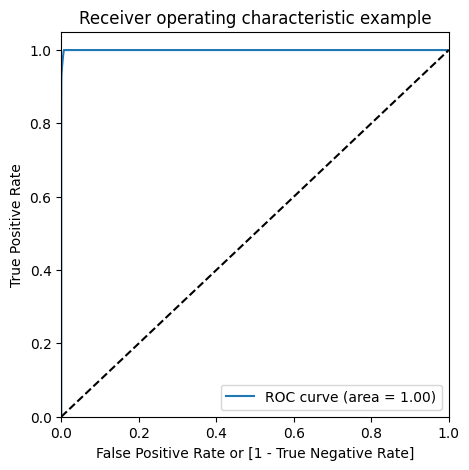

In [147]:
##train metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_ros, y_train_pred))


# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [148]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

[[56436   430]
 [   20    76]]
Accuracy:- 0.9920999964888874
Sensitivity:- 0.7916666666666666
Specificity:- 0.9924383638729645
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.79      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



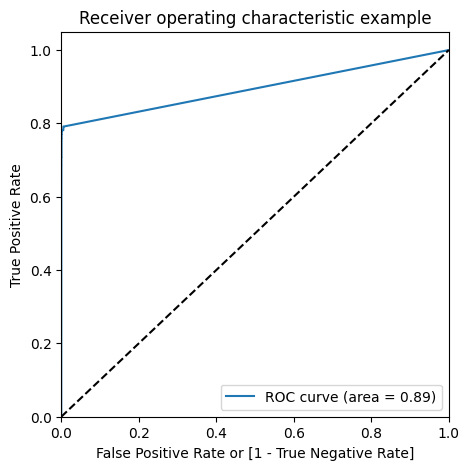

In [149]:
# Test data Metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_prob = dt_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

# ## ***DECISION TREE RANDOM SAMPLING Model summary***
#TRAIN DATA
Accuracy:- 0.9966256171713219
Sensitivity:- 1.0
Specificity:- 0.9932512343426438
ROC AOU : 1.0

# TEST DATA
Accuracy:- 0.9920122186720972
Sensitivity:- 0.7916666666666666
Specificity:- 0.9923504378714874
#ROC AOU : .89


**SMOTE (Synthetic Minority Oversampling Technique)**


In [150]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [151]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [152]:
print('Before SMOTE oversampling X_train shape=', X_train.shape)
print('After SMOTE oversampling X_train shape=', X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


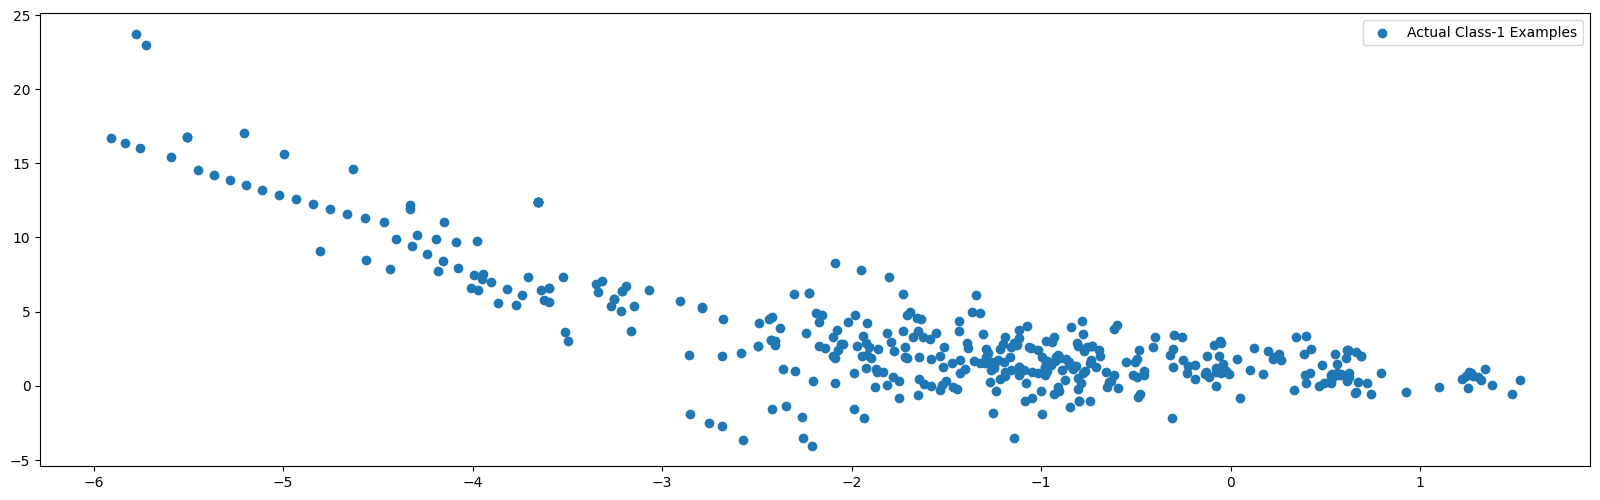

In [155]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

#plt.subplot(3, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
#            label='Artificial SMOTE Class-1 Examples')
##plt.legend()

#plt.subplot(3, 1, 3)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
#plt.legend()

**Logistic Regression SMOTE**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
 The highest test roc_auc is 0.9897547669810569 at C = 1000


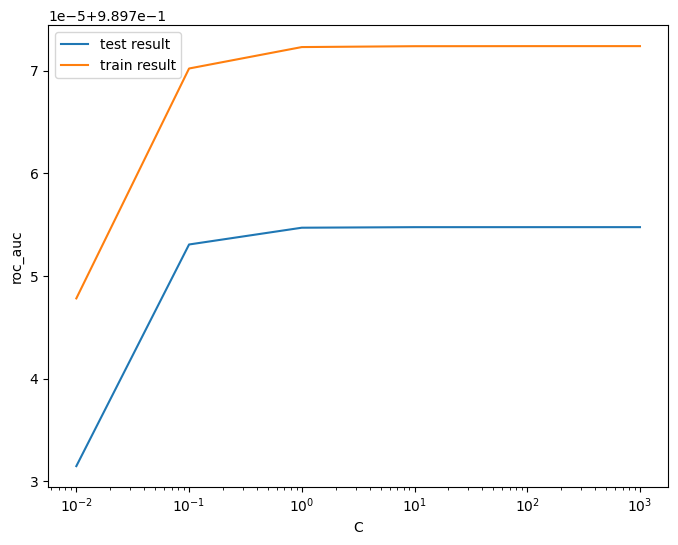

In [156]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
cv_results = pd.DataFrame(model_cv.cv_results_)
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

*Logistic regression with optimal C*


In [164]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [165]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

[[221887   5562]
 [ 17687 209762]]
Accuracy:- 0.9488918394892921
Sensitivity:- 0.9222375125852389
Specificity:- 0.9755461663933453
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



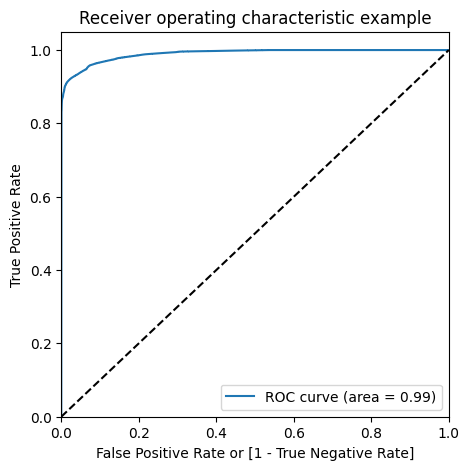

In [168]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_smote, y_train_pred))


# Predicted probability
y_train_pred_proba_log_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_smote)
auc

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_smote)


[[55416  1450]
 [   10    86]]
Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



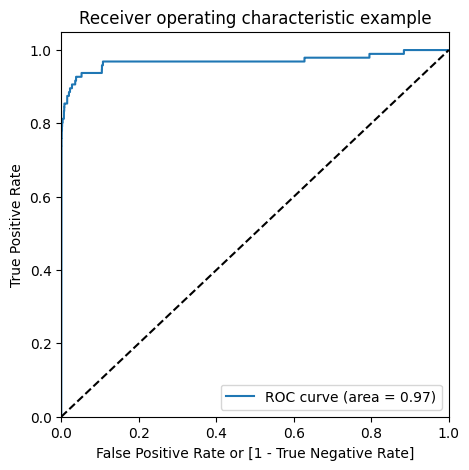

In [169]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**LOGISTIC REGRESSION OPTIMAL C WITH SMOTE MODEL SUMMARY**
#**TEST DATA**
Accuracy:- 0.9488918394892921
Sensitivity:- 0.9222375125852389
Specificity:- 0.9755461663933453
ROC AOU : .99
#**TRAIN DATA**
Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245
ROC aou: .97
Logistic Regression with SMOTE stood out with an ROC score of 0.99 on the training set and 0.97 on the test set.

**XGBoost WITH SMOTE**

In [170]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)
cv_results = pd.DataFrame(model_cv.cv_results_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


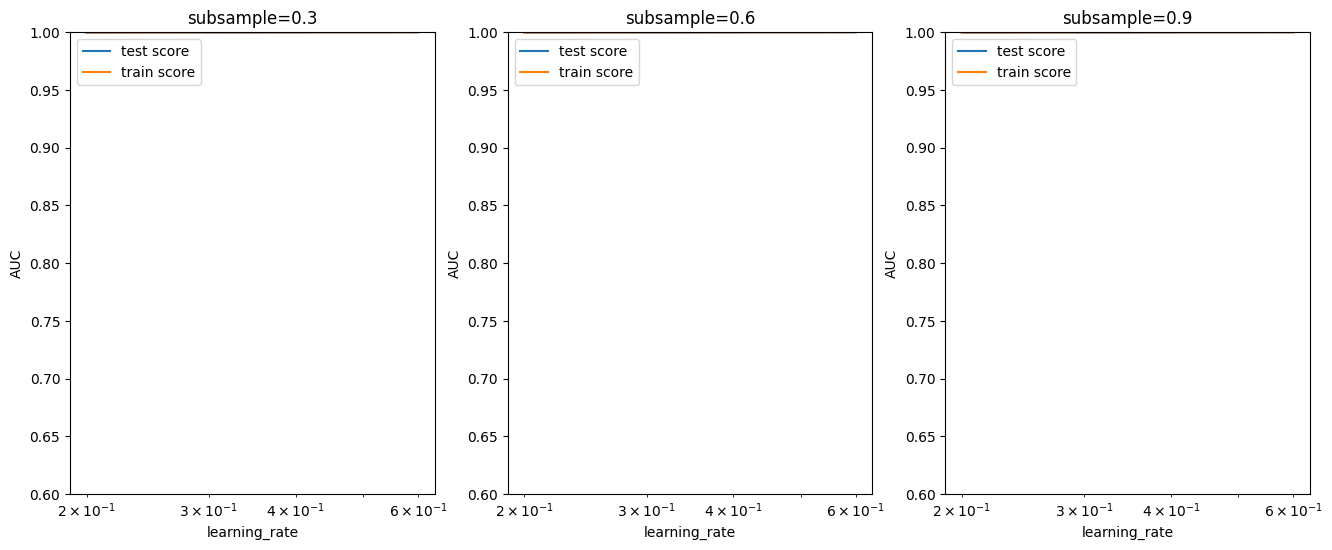

In [171]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [172]:
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.6}

In [173]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [174]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

[[227448      1]
 [     0 227449]]
Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



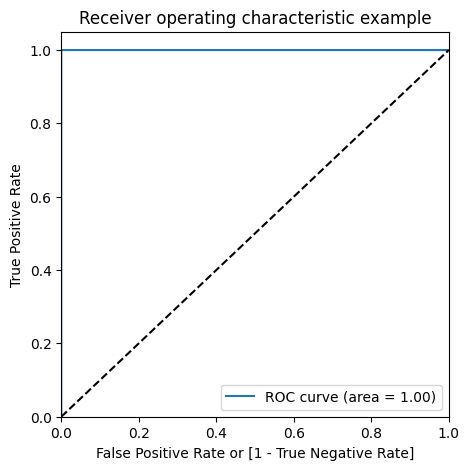

In [175]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_smote, y_train_pred))

# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)


[[56833    33]
 [   20    76]]
Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



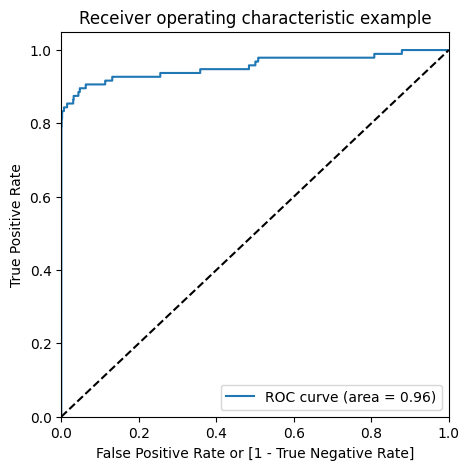

In [176]:

# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#XGBOOST WITH SMOTE MODEL SUMMARY
#**TEST DATA**
Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952
ROC AOU : 1.0
#**TRAIN DATA**
Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507
ROC aou: .96

**DECISITION TREE WITH SMOTE**

In [177]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

cv_results = pd.DataFrame(grid_search.cv_results_)



Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [181]:

# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9981044716519953
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [182]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [184]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

[[223809   3640]
 [  2374 225075]]
Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



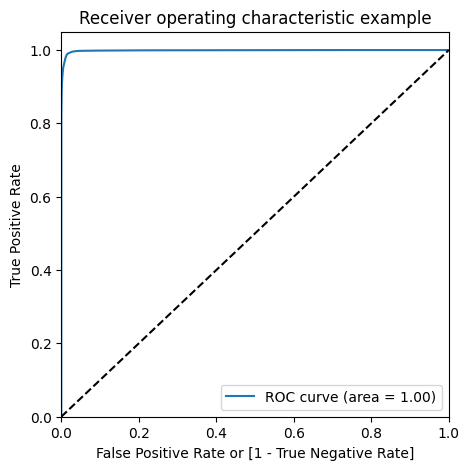

In [185]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_smote, y_train_pred))


# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)



In [186]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)


[[55852  1014]
 [   19    77]]
Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



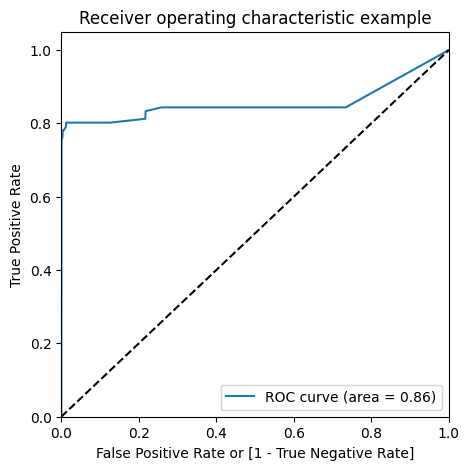

In [187]:

# Test data Metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_prob = dt_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)

**DECISION TREE SMOTE MODEL SUMMARY**
#**TEST DATA**
Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561

ROC AOU : 1
#**TRAIN DATA**
Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326
ROC aou: .86

#**AdaSyn (Adaptive Synthetic Sampling)**


In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

## #print the optimum value of hyperparameters**

In [188]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

### Print the class distribution after applying ADASYN

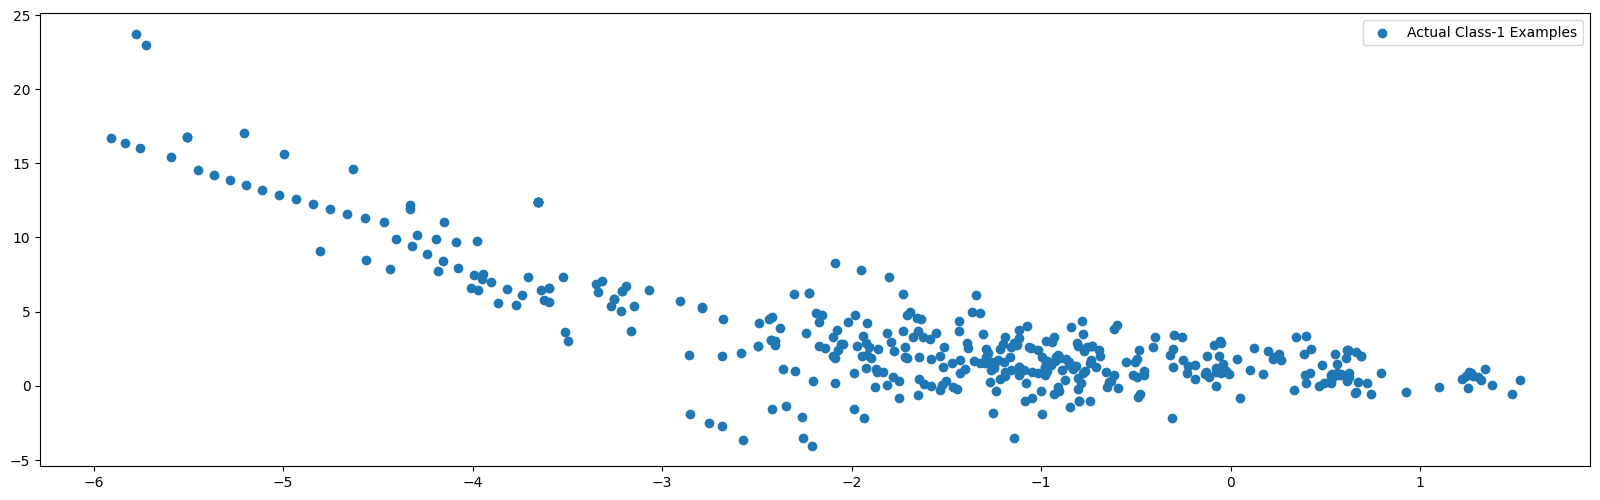

In [190]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()


**Logistic Regression WITH ADASYN**

In [191]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
cv_results = pd.DataFrame(model_cv.cv_results_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


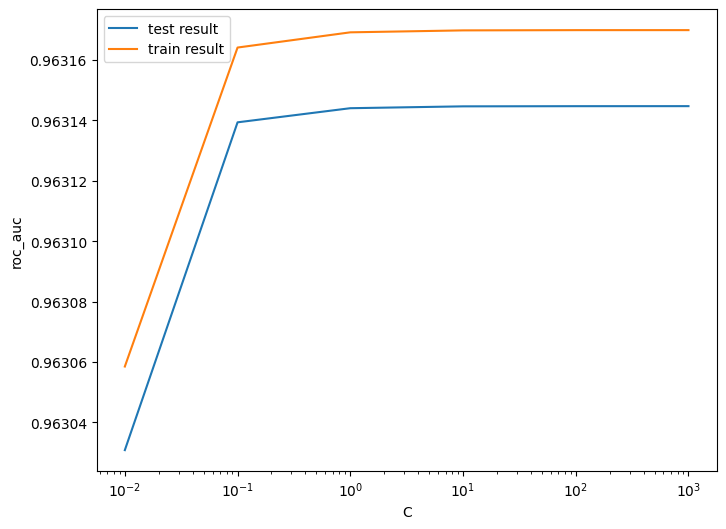

In [192]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [193]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631447476364444 at C = 1000


**Logistic regression with optimal C**

In [194]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [195]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [199]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

[[207033  20416]
 [ 31286 196162]]
Accuracy:- 0.886343501935603
Sensitivity:- 0.862447680348915
Specificity:- 0.9102392184621607
F1-Score:- 0.8835608725615167
              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



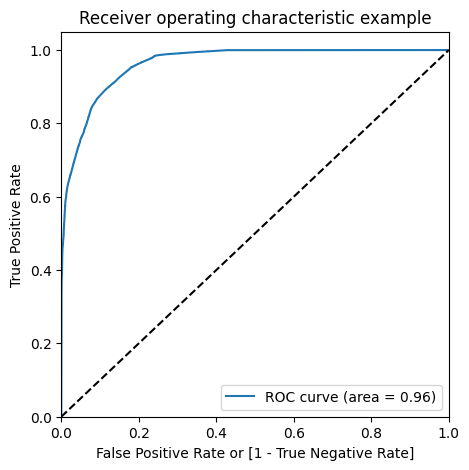

In [200]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

# Predicted probability

y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)



In [201]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

[[51643  5223]
 [    4    92]]
Accuracy:- 0.9082370703275868
Sensitivity:- 0.9583333333333334
Specificity:- 0.908152498856962
F1-Score:- 0.034004805026797265
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



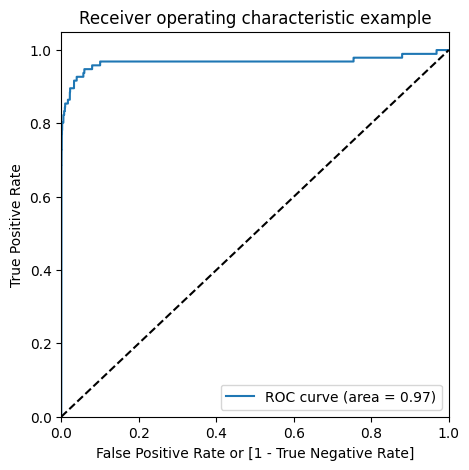

In [202]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**LOGISTIC REGRESSION OPTIMAL C - ADASYN MODEL SUMMARY**
#**TEST DATA**
Accuracy:- 0.886343501935603
Sensitivity:- 0.862447680348915
Specificity:- 0.9102392184621607
F1-Score:- 0.8835608725615167

ROC AOU : .96
#**TRAIN DATA**
Accuracy:- 0.9082370703275868
Sensitivity:- 0.9583333333333334
Specificity:- 0.908152498856962
F1-Score:- 0.034004805026797265
ROC aou: .97

##### Build models on other algorithms to see the better performing on ADASYN




**XGBOOST ADASYN**

In [203]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [204]:

cv_results = pd.DataFrame(model_cv.cv_results_)


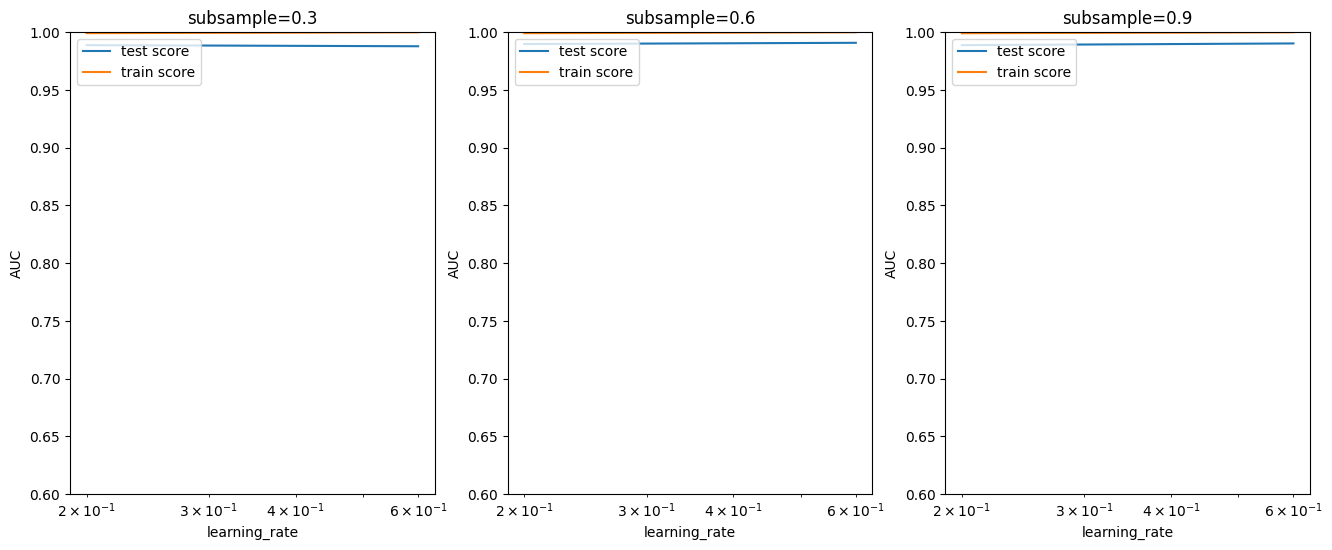

In [205]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [206]:
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.6}

In [207]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [208]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [209]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


Accuracy:- 0.9999934051004953
Sensitivity:- 1.0
Specificity:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



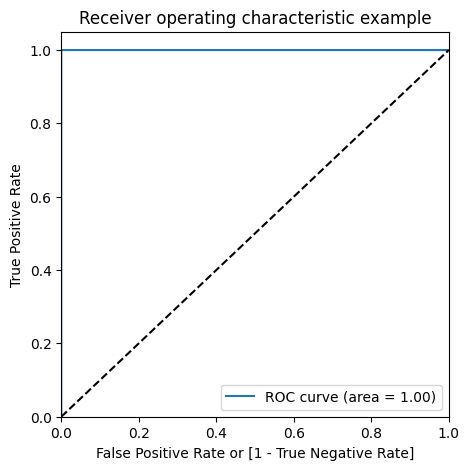

In [210]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)



In [211]:

# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)


[[56828    38]
 [   22    74]]
Accuracy:- 0.9989466661985184
Sensitivity:- 0.7708333333333334
Specificity:- 0.9993317623887736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.77      0.71        96

    accuracy                           1.00     56962
   macro avg       0.83      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



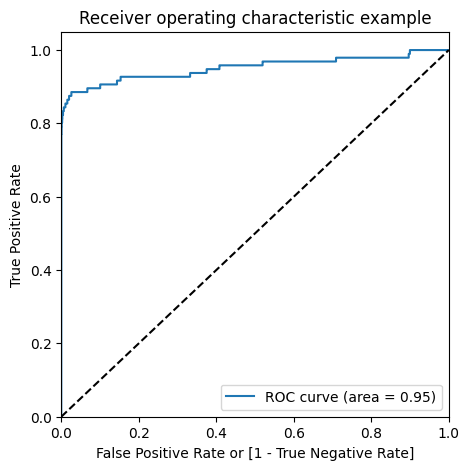

In [212]:

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


**XGBOOST ADASYN MODEL SUMMARY**
#**TEST DATA**
Accuracy:- 0.9999934051004953
Sensitivity:- 1.0
Specificity:- 1.0

ROC AOU : 1.0
#**TRAIN DATA**
Accuracy:- 0.9989466661985184
Sensitivity:- 0.7708333333333334
Specificity:- 0.9993317623887736

ROC aou: .95



**DECISION TREE ADASYN**

In [213]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)
cv_results = pd.DataFrame(grid_search.cv_results_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [214]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9417214918849947
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [215]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [216]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

[[215929  11520]
 [  1118 226330]]
Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929
F1-Score:- 0.9728389118371452
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



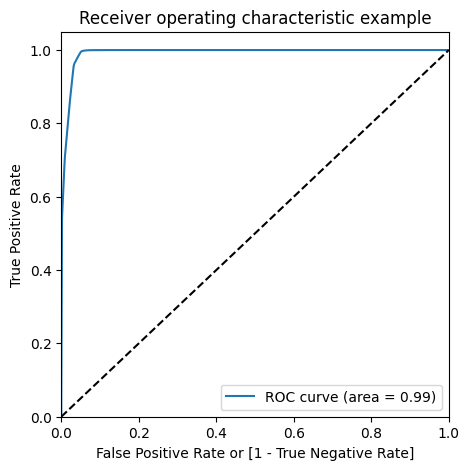

In [217]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)


# Train data Metrics
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)


In [218]:

# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)



[[53880  2986]
 [   15    81]]
Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419
F1-Score:- 0.05121719886184003
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



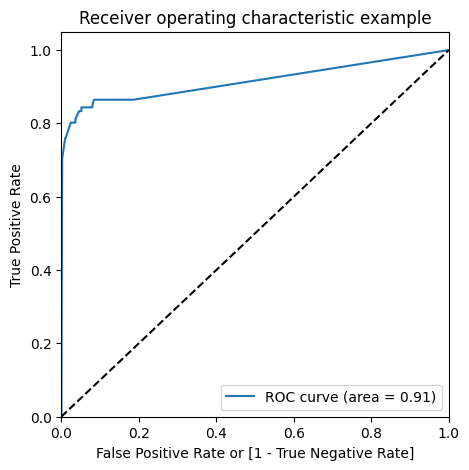

In [219]:
# Test data Metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

# classification_report
print(classification_report(y_test, y_test_pred))

# Predicted probability
y_test_pred_prob = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_prob)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_prob)


#**DECISION TREE ADASYN MODE SUMMARY**
#**TEST DATA**
Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929
F1-Score:- 0.9728389118371452

ROC AOU : .99
#**TRAIN DATA**
Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419
F1-Score:- 0.05121719886184003

ROC aou: .91

Overall, most models performed reasonably well. However, our goal is to identify the best-performing and most practical model.

**🔍 Key Considerations:**

SMOTE and ADASYN preserved the data distribution more effectively and yielded strong results across all models.

Among them, Logistic Regression with SMOTE stood out with an ROC score of 0.99 on the training set and 0.97 on the test set.

**⚖️ Why Logistic Regression with SMOTE?**

Simple and interpretable.

Minimal computational resources required.

Comparable or even superior performance to more complex models like Random Forest and XGBoost.

**📌 Conclusion:**

Considering accuracy, interpretability, and resource efficiency, Logistic Regression with SMOTE emerges as the optimal choice.

In [222]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897681302852576
Threshold= 0.5322737615593738


**🎯 Optimal Threshold Selection**
We observed that a threshold value of 0.53 results in the highest True Positive Rate (TPR) and the lowest False Positive Rate (FPR), yielding the best ROC score among the evaluated thresholds.

**💰 Cost-Benefit Analysis of Model Selection**
Throughout our modeling efforts, we experimented with both balanced and imbalanced datasets using techniques such as SMOTE and ADASYN. A variety of models—Logistic Regression, Random Forest, XGBoost, and SVM—were assessed on metrics including ROC-AUC, Precision, and Recall.

**✅ Performance Considerations:**

Many models performed reasonably well.

However, resource-heavy models like XGBoost, SVM, and Random Forest demand more computational infrastructure, increasing deployment cost.

In contrast, Logistic Regression is lightweight, simple to implement, and highly interpretable—making it cost-effective and easier to integrate.

**💡 Business Impact Evaluation:**

When selecting the best model, we must consider:

Infrastructure readiness and resource constraints.

Potential monetary impact of minor improvements in ROC score:

If slight metric improvements yield significant financial gains or loss prevention, a complex model might justify its higher cost.

If gains are marginal, a simpler model may be more efficient overall.

** Summary for Business Stakeholders**
Model selection should align with transaction patterns and priorities:

Bank Type	Primary Metric	Justification
Small Average Transaction	Precision	Avoid unnecessary customer verification effort and false positives
Large Transaction Value Bank	Recall	Minimize risk of missing high-value fraudulent transactions

**📌 Final Recommendation:**

After extensive model testing, Logistic Regression trained on SMOTE-balanced data offers:

High ROC-AUC and Recall

Strong interpretability

Minimal infrastructure requirements

Scalability across use cases

Thus, it is the most efficient and practical choice for fraud detection across banking scenarios.